# **Penerapan Machine Learning dalam Mempersonalisasi Profil Pengguna Berdasarkan Aktivitas Pembelajaran Online**

# **1. Data Understanding**

## *1.1 Deskripsi Data*

Dataset ini berisi informasi mengenai pengguna yang mengikuti berbagai kursus dalam bidang teknologi dan data science. Setiap baris dalam dataset mewakili seorang pengguna dan mencakup berbagai metrik yang berkaitan dengan aktivitas pembelajaran mereka. Data yang disediakan mencakup:

- **Nama dan ID Pengguna**: Identifikasi unik dan nama pengguna.
- **Jam Belajar**: Total waktu yang dihabiskan pengguna dalam belajar dan mengikuti kursus, terpisah untuk data science, pengembangan backend, dan pengembangan frontend.
- **Jumlah Kursus**: Jumlah kursus tingkat pemula dan lanjutan yang diikuti pengguna dalam masing-masing bidang (data science, backend, frontend).
- **Skor Rata-Rata**: Skor rata-rata yang diperoleh pengguna dalam kursus untuk setiap bidang.
- **Profil Pengguna**: Deskripsi atau kategori pengguna berdasarkan aktivitas pembelajaran mereka.

**Target Prediksi**: Profil pengguna (`PROFILE`), yang merupakan kategori atau deskripsi singkat mengenai pengguna berdasarkan data yang diberikan.

Dataset ini digunakan untuk menganalisis dan memprediksi profil pengguna berdasarkan aktivitas kursus dan performa belajar mereka.

## *1.2 Sumber Data*

Dataset utama yang akan digunakan dalam kompetisi disediakan oleh panitia *Innovative Competition and National Informatics Conference (ICONIC-IT)*. Dataset ini telah dipilih dan disiapkan oleh panitia untuk mencakup informasi yang relevan dengan tema dan permasalahan yang diangkat dalam kompetisi.

## *1.3 Metadata*

1. **NAME**
   - Deskripsi: Nama pengguna. Ini bisa berupa nama lengkap atau nama panggilan pengguna yang mengikuti kursus.
   - Tipe Data: object

2. **USER_ID**
   - Deskripsi: ID unik pengguna. Ini adalah pengenal unik untuk setiap pengguna dalam dataset.
   - Tipe Data: int64

3. **HOURS_DATASCIENCE**
   - Deskripsi: Jumlah jam yang dihabiskan oleh pengguna untuk belajar atau mengikuti kursus terkait data science.
   - Tipe Data: float64

4. **HOURS_BACKEND**
   - Deskripsi: Jumlah jam yang dihabiskan oleh pengguna untuk belajar atau mengikuti kursus terkait pengembangan backend.
   - Tipe Data: float64

5. **HOURS_FRONTEND**
   - Deskripsi: Jumlah jam yang dihabiskan oleh pengguna untuk belajar atau mengikuti kursus terkait pengembangan frontend.
   - Tipe Data: float64

6. **NUM_COURSES_BEGINNER_DATASCIENCE**
   - Deskripsi: Jumlah kursus tingkat pemula yang diikuti pengguna dalam bidang data science.
   - Tipe Data: float64

7. **NUM_COURSES_BEGINNER_BACKEND**
   - Deskripsi: Jumlah kursus tingkat pemula yang diikuti pengguna dalam bidang pengembangan backend.
   - Tipe Data: float64

8. **NUM_COURSES_BEGINNER_FRONTEND**
   - Deskripsi: Jumlah kursus tingkat pemula yang diikuti pengguna dalam bidang pengembangan frontend.
   - Tipe Data: float64

9. **NUM_COURSES_ADVANCED_DATASCIENCE**
   - Deskripsi: Jumlah kursus tingkat lanjutan yang diikuti pengguna dalam bidang data science.
   - Tipe Data: float64

10. **NUM_COURSES_ADVANCED_BACKEND**
    - Deskripsi: Jumlah kursus tingkat lanjutan yang diikuti pengguna dalam bidang pengembangan backend.
    - Tipe Data: float64

11. **NUM_COURSES_ADVANCED_FRONTEND**
    - Deskripsi: Jumlah kursus tingkat lanjutan yang diikuti pengguna dalam bidang pengembangan frontend.
    - Tipe Data: float64

12. **AVG_SCORE_DATASCIENCE**
    - Deskripsi: Skor rata-rata yang diperoleh pengguna dalam kursus terkait data science.
    - Tipe Data: float64

13. **AVG_SCORE_BACKEND**
    - Deskripsi: Skor rata-rata yang diperoleh pengguna dalam kursus terkait pengembangan backend.
    - Tipe Data: float64

14. **AVG_SCORE_FRONTEND**
    - Deskripsi: Skor rata-rata yang diperoleh pengguna dalam kursus terkait pengembangan frontend.
    - Tipe Data: float64

15. **PROFILE**
    - Deskripsi: Profil pengguna. Ini bisa merujuk pada deskripsi singkat, status keahlian, atau kategori pengguna berdasarkan profil pembelajaran mereka.
    - Tipe Data: object
    - Target Prediksi: Ya

# **2. Import Library dan Data**

## *2.1 Import Library*

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string
import os
import missingno as msno
import math
from scipy.stats import ttest_ind
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

import pingouin as pg

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, average_precision_score, roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_row", None)

def check_duplicates(dataframe, kolom = None):
    """
    Memeriksa nilai duplikat dari DataFrame.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset = kolom)]
    print(f"Jumlah Duplikat data: {duplicate_values.shape[0]}")
    display(duplicate_values.head(10))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False)
    percent = percent.round(3)  # Membulatkan persentase hingga 3 angka di belakang koma
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    """
    # Menampilkan lima baris pertama DataFrame
    print("Preview Data:")
    print("---------------------------")
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("---------------------------")
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("---------------------------")
    display(dataframe.describe())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *2.2 Set Path Directory*

In [ ]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/11. ICONIC IT"

In [ ]:
dataPath = os.path.join(mainPath, "Dataset/All Dataset From Iconic IT")
modelPath = os.path.join(mainPath, "Trained Model")
dataAfterProcessingPath = os.path.join(mainPath, "Dataset/Datset After Processing")
# os.makedirs(modelPath, exist_ok=True)

## *2.3 Read Data*

In [ ]:
pendidikan = pd.read_csv(dataPath + "/Pendidikan/dataset-tortuga.csv").drop("Unnamed: 0", axis=1)

# **3. Data Processing**

## *3.1 Simply Explore Dataset*

In [ ]:
missing_data(pendidikan)

Total  Percent
AVG_SCORE_DATASCIENCE               220    1.100
AVG_SCORE_FRONTEND                  168    0.840
AVG_SCORE_BACKEND                    84    0.420
HOURS_BACKEND                        53    0.265
NUM_COURSES_BEGINNER_FRONTEND        39    0.195
NUM_COURSES_ADVANCED_FRONTEND        37    0.185
NUM_COURSES_BEGINNER_DATASCIENCE     26    0.130
NUM_COURSES_BEGINNER_BACKEND         18    0.090
HOURS_FRONTEND                       16    0.080
HOURS_DATASCIENCE                    14    0.070
NUM_COURSES_ADVANCED_BACKEND          8    0.040
NUM_COURSES_ADVANCED_DATASCIENCE      2    0.010
NAME                                  0    0.000
USER_ID                               0    0.000
PROFILE                               0    0.000

In [ ]:
check_duplicates(pendidikan)

Nilai Duplikat (10 Teratas):
Jumlah Duplikat data: 0


Empty DataFrame
Columns: [NAME, USER_ID, HOURS_DATASCIENCE, HOURS_BACKEND, HOURS_FRONTEND, NUM_COURSES_BEGINNER_DATASCIENCE, NUM_COURSES_BEGINNER_BACKEND, NUM_COURSES_BEGINNER_FRONTEND, NUM_COURSES_ADVANCED_DATASCIENCE, NUM_COURSES_ADVANCED_BACKEND, NUM_COURSES_ADVANCED_FRONTEND, AVG_SCORE_DATASCIENCE, AVG_SCORE_BACKEND, AVG_SCORE_FRONTEND, PROFILE]
Index: []

In [ ]:
basic_data_info(pendidikan)

Preview Data:
---------------------------


NAME   USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  \
0        Stormy Muto  58283940                7.0           39.0   
1       Carlos Ferro   1357218               32.0            0.0   
2  Robby Constantini  63212105               45.0            0.0   
3       Paul Mckenny  23239851               36.0           19.0   
4          Jean Webb  72234478               61.0           78.0   

   HOURS_FRONTEND  NUM_COURSES_BEGINNER_DATASCIENCE  \
0            29.0                               2.0   
1            44.0                               2.0   
2            59.0                               0.0   
3            28.0                               0.0   
4            38.0                               6.0   

   NUM_COURSES_BEGINNER_BACKEND  NUM_COURSES_BEGINNER_FRONTEND  \
0                           4.0                            0.0   
1                           0.0                            0.0   
2                           5.0                            4.0   
3                           5.0                            7.0   
4                          11.0                            0.0   

   NUM_COURSES_ADVANCED_DATASCIENCE  NUM_COURSES_ADVANCED_BACKEND  \
0                               2.0                           5.0   
1                               0.0                           5.0   
2                               0.0                           4.0   
3                               0.0                           5.0   
4                               4.0                           3.0   

   NUM_COURSES_ADVANCED_FRONTEND  AVG_SCORE_DATASCIENCE  AVG_SCORE_BACKEND  \
0                            0.0                   84.0               74.0   
1                            0.0                   67.0               45.0   
2                            1.0                    NaN               54.0   
3                            3.0                    NaN               71.0   
4                            0.0                   66.0               85.0   

   AVG_SCORE_FRONTEND                PROFILE  
0                 NaN     beginner_front_end  
1                 NaN     beginner_front_end  
2                47.0     advanced_front_end  
3                89.0  beginner_data_science  
4                 NaN     advanced_front_end


Informasi Umum:
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NAME                              20000 non-null  object 
 1   USER_ID                           20000 non-null  int64  
 2   HOURS_DATASCIENCE                 19986 non-null  float64
 3   HOURS_BACKEND                     19947 non-null  float64
 4   HOURS_FRONTEND                    19984 non-null  float64
 5   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 6   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 7   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 8   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 9   NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 10  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 11  AVG_SCORE_DATASCIENCE 

USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  HOURS_FRONTEND  \
count  2.000000e+04       19986.000000   19947.000000    19984.000000   
mean   5.013036e+07          37.565296      43.552263       36.936599   
std    2.880690e+07          22.394805      22.387518       20.590381   
min    1.172000e+03           0.000000       0.000000        0.000000   
25%    2.534718e+07          21.000000      28.000000       22.000000   
50%    5.012472e+07          37.000000      43.000000       37.000000   
75%    7.513944e+07          53.000000      59.000000       51.000000   
max    9.999234e+07         127.000000     147.000000      124.000000   

       NUM_COURSES_BEGINNER_DATASCIENCE  NUM_COURSES_BEGINNER_BACKEND  \
count                      19974.000000                  19982.000000   
mean                           3.698608                      3.715144   
std                            2.001647                      2.101863   
min                            0.000000                      0.000000   
25%                            2.000000                      2.000000   
50%                            4.000000                      4.000000   
75%                            5.000000                      5.000000   
max                           12.000000                     12.000000   

       NUM_COURSES_BEGINNER_FRONTEND  NUM_COURSES_ADVANCED_DATASCIENCE  \
count                   19961.000000                      19998.000000   
mean                        4.048294                          3.397140   
std                         2.296000                          2.111437   
min                         0.000000                          0.000000   
25%                         2.000000                          2.000000   
50%                         4.000000                          3.000000   
75%                         6.000000                          5.000000   
max                        13.000000                         13.000000   

       NUM_COURSES_ADVANCED_BACKEND  NUM_COURSES_ADVANCED_FRONTEND  \
count                  19992.000000                    19963.00000   
mean                       4.344338                        3.36783   
std                        2.161569                        1.98784   
min                        0.000000                        0.00000   
25%                        3.000000                        2.00000   
50%                        4.000000                        3.00000   
75%                        6.000000                        5.00000   
max                       14.000000                       12.00000   

       AVG_SCORE_DATASCIENCE  AVG_SCORE_BACKEND  AVG_SCORE_FRONTEND  
count           19780.000000       19916.000000        19832.000000  
mean               65.070324          67.234535           67.130748  
std                13.950559          14.214591           14.446830  
min                 7.000000          10.000000            0.000000  
25%                56.000000          58.000000           58.000000  
50%                65.000000          68.000000           68.000000  
75%                75.000000          77.000000           77.000000  
max               100.000000         100.000000          100.000000

In [ ]:
pendidikan["PROFILE"].value_counts()

PROFILE
advanced_backend         3339
advanced_front_end       3337
beginner_front_end       3335
beginner_backend         3332
advanced_data_science    3330
beginner_data_science    3327
Name: count, dtype: int64

Label dari data diatas sudah balanced jadi tidak mengalami Data Imbalanced dan memang tidak perlu melakukan metode balancing data kembali.

In [ ]:
pendidikan.shape

(20000, 15)

## *3.2 Check and Imputaion Missing Value*

In [ ]:
pendidikan.isnull().sum()

NAME                                  0
USER_ID                               0
HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
PROFILE                               0
dtype: int64

Untuk null atau missing value pada data juga terbilang cukup rendah untuk data berjumlah total sebesar 20 ribu baris. Namun tetap untuk mempertahankan semua data yang ada dengan cara yang memang sesuai. Imputasinya akan dilakukan per class nya, karena untung-nya data sudah memiliki class jadi hasil imputasi akan lebih merepresentasikan class tersebut.

In [ ]:
advanced_backend = pendidikan[pendidikan["PROFILE"] == "advanced_backend"]
advanced_data_science = pendidikan[pendidikan["PROFILE"] == "advanced_data_science"]
advanced_front_end = pendidikan[pendidikan["PROFILE"] == "advanced_front_end"]
beginner_data_science = pendidikan[pendidikan["PROFILE"] == "beginner_data_science"]
beginner_front_end = pendidikan[pendidikan["PROFILE"] == "beginner_front_end"]
beginner_backend = pendidikan[pendidikan["PROFILE"] == "beginner_backend"]

In [ ]:
all_class = [advanced_backend, advanced_data_science, advanced_front_end, beginner_data_science, beginner_front_end, beginner_backend]
all_class_name = ["advanced_backend", "advanced_data_science", "advanced_front_end", "beginner_data_science", "beginner_front_end", "beginner_backend"]

In [ ]:
for i, data in enumerate(all_class):
  print(all_class_name[i])
  display(data.isnull().sum())
  print("\n\n")

advanced_backend


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    1
HOURS_BACKEND                        9
HOURS_FRONTEND                       3
NUM_COURSES_BEGINNER_DATASCIENCE     4
NUM_COURSES_BEGINNER_BACKEND         2
NUM_COURSES_BEGINNER_FRONTEND        2
NUM_COURSES_ADVANCED_DATASCIENCE     1
NUM_COURSES_ADVANCED_BACKEND         1
NUM_COURSES_ADVANCED_FRONTEND        8
AVG_SCORE_DATASCIENCE                9
AVG_SCORE_BACKEND                   22
AVG_SCORE_FRONTEND                  16
PROFILE                              0
dtype: int64




advanced_data_science


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    1
HOURS_BACKEND                        8
HOURS_FRONTEND                       1
NUM_COURSES_BEGINNER_DATASCIENCE     2
NUM_COURSES_BEGINNER_BACKEND         5
NUM_COURSES_BEGINNER_FRONTEND        7
NUM_COURSES_ADVANCED_DATASCIENCE     0
NUM_COURSES_ADVANCED_BACKEND         1
NUM_COURSES_ADVANCED_FRONTEND        6
AVG_SCORE_DATASCIENCE               25
AVG_SCORE_BACKEND                    3
AVG_SCORE_FRONTEND                  21
PROFILE                              0
dtype: int64




advanced_front_end


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    3
HOURS_BACKEND                        7
HOURS_FRONTEND                       4
NUM_COURSES_BEGINNER_DATASCIENCE     4
NUM_COURSES_BEGINNER_BACKEND         4
NUM_COURSES_BEGINNER_FRONTEND        4
NUM_COURSES_ADVANCED_DATASCIENCE     1
NUM_COURSES_ADVANCED_BACKEND         0
NUM_COURSES_ADVANCED_FRONTEND        8
AVG_SCORE_DATASCIENCE               29
AVG_SCORE_BACKEND                    4
AVG_SCORE_FRONTEND                  25
PROFILE                              0
dtype: int64




beginner_data_science


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    3
HOURS_BACKEND                        9
HOURS_FRONTEND                       2
NUM_COURSES_BEGINNER_DATASCIENCE     7
NUM_COURSES_BEGINNER_BACKEND         1
NUM_COURSES_BEGINNER_FRONTEND        7
NUM_COURSES_ADVANCED_DATASCIENCE     0
NUM_COURSES_ADVANCED_BACKEND         2
NUM_COURSES_ADVANCED_FRONTEND        5
AVG_SCORE_DATASCIENCE               41
AVG_SCORE_BACKEND                   32
AVG_SCORE_FRONTEND                   7
PROFILE                              0
dtype: int64




beginner_front_end


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    2
HOURS_BACKEND                       10
HOURS_FRONTEND                       5
NUM_COURSES_BEGINNER_DATASCIENCE     4
NUM_COURSES_BEGINNER_BACKEND         3
NUM_COURSES_BEGINNER_FRONTEND       12
NUM_COURSES_ADVANCED_DATASCIENCE     0
NUM_COURSES_ADVANCED_BACKEND         1
NUM_COURSES_ADVANCED_FRONTEND        5
AVG_SCORE_DATASCIENCE               52
AVG_SCORE_BACKEND                    3
AVG_SCORE_FRONTEND                  33
PROFILE                              0
dtype: int64




beginner_backend


NAME                                 0
USER_ID                              0
HOURS_DATASCIENCE                    4
HOURS_BACKEND                       10
HOURS_FRONTEND                       1
NUM_COURSES_BEGINNER_DATASCIENCE     5
NUM_COURSES_BEGINNER_BACKEND         3
NUM_COURSES_BEGINNER_FRONTEND        7
NUM_COURSES_ADVANCED_DATASCIENCE     0
NUM_COURSES_ADVANCED_BACKEND         3
NUM_COURSES_ADVANCED_FRONTEND        5
AVG_SCORE_DATASCIENCE               64
AVG_SCORE_BACKEND                   20
AVG_SCORE_FRONTEND                  66
PROFILE                              0
dtype: int64

In [ ]:
for i, dataframe in enumerate(all_class):
    # Select only numeric columns (excluding object types)
    numeric_columns = dataframe.select_dtypes(exclude=['object']).columns

    for column in numeric_columns:
        # Calculate the mean for the current numeric column and convert it to an integer
        mean_value = int(dataframe[column].mean())

        # Fill missing values in the column with the integer mean
        dataframe[column].fillna(mean_value, inplace=True)

Untuk menangani missing value, kolom-kolom dipisahkan berdasarkan tipe data, yaitu numerik dan kategorikal(tidak ada missing value). Hanya kolom dengan tipe data numerik yang kemudian diimputasi menggunakan nilai rata-rata (mean). Imputasi dilakukan secara terpisah untuk setiap kelas berdasarkan variabel target, yaitu kolom 'PROFILE'. Dengan cara ini, nilai imputasi yang digunakan lebih merepresentasikan data dari masing-masing kelas karena perhitungannya tidak mencampur data dari kelas yang berbeda.

In [ ]:
# Combine all DataFrames into one by stacking them vertically
pendidikan = pd.concat(all_class, axis=0, ignore_index=True)

In [ ]:
pendidikan.isnull().sum()

NAME                                0
USER_ID                             0
HOURS_DATASCIENCE                   0
HOURS_BACKEND                       0
HOURS_FRONTEND                      0
NUM_COURSES_BEGINNER_DATASCIENCE    0
NUM_COURSES_BEGINNER_BACKEND        0
NUM_COURSES_BEGINNER_FRONTEND       0
NUM_COURSES_ADVANCED_DATASCIENCE    0
NUM_COURSES_ADVANCED_BACKEND        0
NUM_COURSES_ADVANCED_FRONTEND       0
AVG_SCORE_DATASCIENCE               0
AVG_SCORE_BACKEND                   0
AVG_SCORE_FRONTEND                  0
PROFILE                             0
dtype: int64

## *3.2 Check and Handling Outliers*

Metode Inter Quartile Range (IQR) adalah salah satu prosedur yang paling banyak digunakan untuk deteksi dan penghapusan outlier. Hal ini dapat diterapkan dengan menemukan kuartil pertama dan ketiga (Q1 dan Q3) kemudian menghitung nilai IQRnya dengan mengurangi Q3 dan Q1. Kemudian dari nilai IQR dikalikan dengan 1,5 baru ketika menemukan batas bawah  (Q1 – 1,5*IQR) dan batas atas (Q3 + 1,5*IQR). Jadi setiap titik data di luar rentang ini, entah itu di bawah atau di atas akan dianggap sebagai outlier dan harus dihapus untuk analisis lebih lanjut.

In [ ]:
numeric_cols = dataframe.select_dtypes(exclude=['object']).columns[1:]

In [ ]:
numeric_cols

Index(['HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
       'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND',
       'NUM_COURSES_BEGINNER_FRONTEND', 'NUM_COURSES_ADVANCED_DATASCIENCE',
       'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
       'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],
      dtype='object')

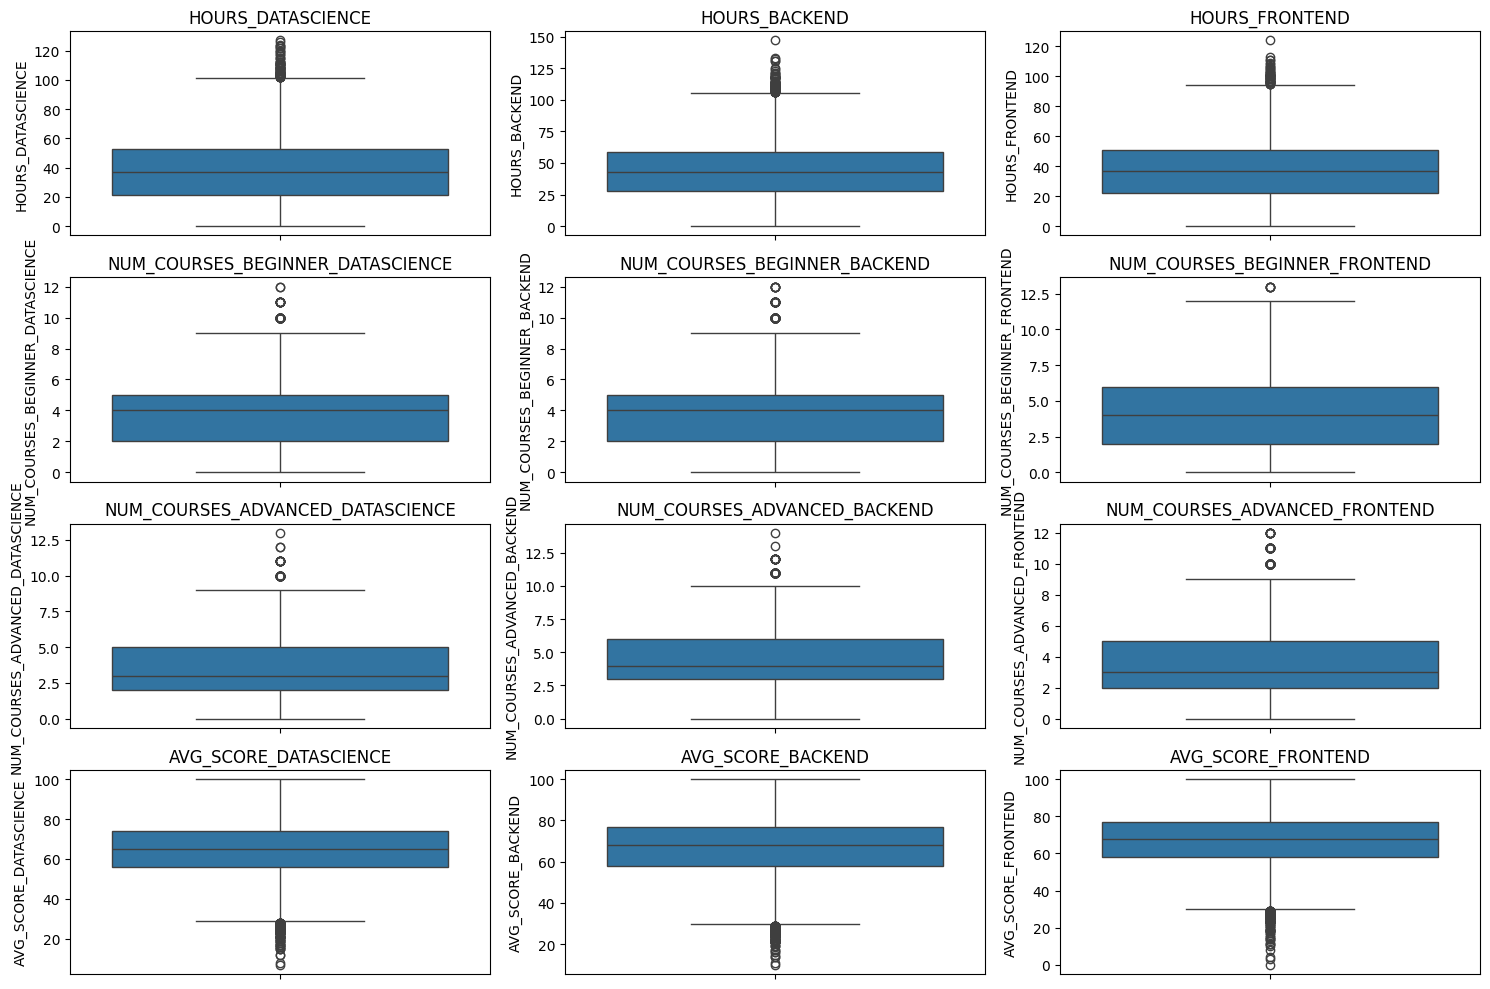

In [ ]:
# Visualize data using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=pendidikan[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Identify outliers using IQR
def identify_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outliers_dict = {col: identify_outliers(pendidikan, col) for col in numeric_cols}

In [ ]:
jumlah_outlier = []
# Print number of outliers for each numeric column
for col, outliers in outliers_dict.items():
    print(f"====== ====== Outliers in {col}: ====== ======\n")
    display(f"Jumlah Outlier {outliers.shape[0]}")
    jumlah_outlier.append(outliers.shape[0])
    print("\n")

====== ====== Outliers in HOURS_DATASCIENCE: ====== ======



'Jumlah Outlier 71'



====== ====== Outliers in HOURS_BACKEND: ====== ======



'Jumlah Outlier 84'



====== ====== Outliers in HOURS_FRONTEND: ====== ======



'Jumlah Outlier 49'



====== ====== Outliers in NUM_COURSES_BEGINNER_DATASCIENCE: ====== ======



'Jumlah Outlier 71'



====== ====== Outliers in NUM_COURSES_BEGINNER_BACKEND: ====== ======



'Jumlah Outlier 117'



====== ====== Outliers in NUM_COURSES_BEGINNER_FRONTEND: ====== ======



'Jumlah Outlier 5'



====== ====== Outliers in NUM_COURSES_ADVANCED_DATASCIENCE: ====== ======



'Jumlah Outlier 57'



====== ====== Outliers in NUM_COURSES_ADVANCED_BACKEND: ====== ======



'Jumlah Outlier 72'



====== ====== Outliers in NUM_COURSES_ADVANCED_FRONTEND: ====== ======



'Jumlah Outlier 132'



====== ====== Outliers in AVG_SCORE_DATASCIENCE: ====== ======



'Jumlah Outlier 105'



====== ====== Outliers in AVG_SCORE_BACKEND: ====== ======



'Jumlah Outlier 114'



====== ====== Outliers in AVG_SCORE_FRONTEND: ====== ======



'Jumlah Outlier 129'

In [ ]:
np.sum(jumlah_outlier)

1006

In [ ]:
# Print outliers for each numeric column
for col, outliers in outliers_dict.items():
    print(f"====== ====== Outliers in {col}: ====== ======\n")
    display(outliers[col])
    print("\n")

====== ====== Outliers in HOURS_DATASCIENCE: ====== ======



752      112.0
2010     120.0
4181     102.0
4271     105.0
4882     103.0
         ...  
17110    105.0
18100    104.0
18768    102.0
19473    103.0
19498    122.0
Name: HOURS_DATASCIENCE, Length: 71, dtype: float64



====== ====== Outliers in HOURS_BACKEND: ====== ======



99       106.0
240      110.0
2348     109.0
2355     111.0
4480     113.0
         ...  
18676    123.0
19157    119.0
19342    114.0
19498    106.0
19688    120.0
Name: HOURS_BACKEND, Length: 84, dtype: float64



====== ====== Outliers in HOURS_FRONTEND: ====== ======



3934      96.0
4512      98.0
4827     105.0
5780      99.0
6304     102.0
6595      96.0
7615      99.0
8467      95.0
10011     96.0
10061     96.0
10306     95.0
10320    101.0
10495     95.0
10681    107.0
10683    113.0
10688    101.0
10780     98.0
10820     97.0
10856    101.0
10863    111.0
10887     97.0
10890    101.0
10899     99.0
11042     95.0
11049    102.0
11064    100.0
11073    106.0
11089     99.0
11102    104.0
11137    103.0
11498    103.0
11556    106.0
11771    105.0
11777    101.0
11858    100.0
11886     96.0
11965    111.0
12070     96.0
12165    103.0
12282     99.0
12513    100.0
12561    124.0
12763    101.0
13147     97.0
13220     98.0
13299    108.0
13318     97.0
16199    109.0
19693    100.0
Name: HOURS_FRONTEND, dtype: float64



====== ====== Outliers in NUM_COURSES_BEGINNER_DATASCIENCE: ====== ======



162      10.0
298      12.0
306      10.0
442      10.0
499      12.0
         ... 
6075     10.0
11728    10.0
11764    10.0
11986    10.0
14518    10.0
Name: NUM_COURSES_BEGINNER_DATASCIENCE, Length: 71, dtype: float64



====== ====== Outliers in NUM_COURSES_BEGINNER_BACKEND: ====== ======



6670     11.0
6740     10.0
6789     10.0
6806     10.0
6842     10.0
         ... 
18467    10.0
18729    10.0
19311    10.0
19442    10.0
19747    10.0
Name: NUM_COURSES_BEGINNER_BACKEND, Length: 117, dtype: float64



====== ====== Outliers in NUM_COURSES_BEGINNER_FRONTEND: ====== ======



10199    13.0
10226    13.0
10390    13.0
11492    13.0
12739    13.0
Name: NUM_COURSES_BEGINNER_FRONTEND, dtype: float64



====== ====== Outliers in NUM_COURSES_ADVANCED_DATASCIENCE: ====== ======



14       11.0
58       10.0
65       11.0
75       11.0
175      10.0
242      12.0
245      10.0
270      10.0
404      10.0
495      10.0
641      10.0
749      10.0
856      11.0
858      10.0
863      10.0
960      10.0
1008     10.0
1278     10.0
1292     10.0
1343     10.0
1561     10.0
1564     11.0
1802     10.0
1836     10.0
1935     10.0
2062     10.0
2065     11.0
2079     11.0
2081     10.0
2088     10.0
2135     12.0
2241     10.0
2871     10.0
3049     10.0
3332     10.0
3336     10.0
3880     11.0
5278     11.0
6133     11.0
8421     10.0
8447     10.0
10028    10.0
10389    10.0
10777    10.0
11608    10.0
11699    10.0
11908    10.0
12814    10.0
15270    10.0
15776    10.0
16812    10.0
18004    13.0
18154    10.0
19400    10.0
19512    11.0
19770    10.0
19880    10.0
Name: NUM_COURSES_ADVANCED_DATASCIENCE, dtype: float64



====== ====== Outliers in NUM_COURSES_ADVANCED_BACKEND: ====== ======



496      11.0
3347     11.0
3455     11.0
3619     12.0
3695     11.0
         ... 
19496    11.0
19576    11.0
19708    12.0
19746    11.0
19929    11.0
Name: NUM_COURSES_ADVANCED_BACKEND, Length: 72, dtype: float64



====== ====== Outliers in NUM_COURSES_ADVANCED_FRONTEND: ====== ======



2        10.0
17       10.0
28       10.0
45       10.0
54       10.0
         ... 
15703    10.0
16083    11.0
17436    10.0
18048    11.0
19052    10.0
Name: NUM_COURSES_ADVANCED_FRONTEND, Length: 132, dtype: float64



====== ====== Outliers in AVG_SCORE_DATASCIENCE: ====== ======



1627     25.0
3441     24.0
4041     28.0
4223     25.0
6749     21.0
         ... 
13202    22.0
13252    23.0
13326    23.0
15591    26.0
17199    20.0
Name: AVG_SCORE_DATASCIENCE, Length: 105, dtype: float64



====== ====== Outliers in AVG_SCORE_BACKEND: ====== ======



1479     27.0
3348     25.0
3356     28.0
3482     26.0
3511     24.0
         ... 
16297    25.0
16496    25.0
16627    29.0
16638    21.0
18120    29.0
Name: AVG_SCORE_BACKEND, Length: 114, dtype: float64



====== ====== Outliers in AVG_SCORE_FRONTEND: ====== ======



4164     29.0
4403     19.0
5880     29.0
5999     28.0
6126     27.0
         ... 
15483    23.0
15965    28.0
15991    26.0
16047    29.0
19747    25.0
Name: AVG_SCORE_FRONTEND, Length: 129, dtype: float64

In [ ]:
# Remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
pendidikan_cleaned = pendidikan.copy()
for col in numeric_cols:
    pendidikan_cleaned = remove_outliers(pendidikan_cleaned, col)

In [ ]:
# # Save the cleaned
# pendidikan_cleaned.to_csv(dataAfterProcessingPath + '/pendidikan_cleaned.csv', index=False)

In [ ]:
display(pendidikan_cleaned.PROFILE.value_counts().sum())
pendidikan_cleaned.PROFILE.value_counts()

19035

PROFILE
beginner_backend         3253
beginner_data_science    3225
advanced_data_science    3201
beginner_front_end       3142
advanced_backend         3128
advanced_front_end       3086
Name: count, dtype: int64

Ini adalah hasil akhir data setelah melalui proses pembersihan dan pemrosesan. Data sudah bersih, dan hasilnya cukup baik. Tidak ada masalah imbalanced data, dan jumlah setiap kelas masih tergolong seimbang meskipun ada sedikit perbedaan jumlah antar kelas.

# **4. Eksplorasi Data (Exploratory Data Analysis - EDA)**

Exploratory Data Analysis (EDA) adalah proses pemeriksaan dataset yang tersedia untuk menemukan pola, mendeteksi anomali, menguji hipotesis, dan memeriksa asumsi menggunakan ukuran statistik. EDA merupakan langkah awal sebelum melakukan pemodelan formal atau formulasi hipotesis. Tujuan utama dari EDA adalah untuk memahami apa yang dapat dikatakan oleh data sebelum melakukan analisis lebih lanjut.

## *4.1 Descriptive Statistics*


Descriptive Statistics memberikan ringkasan dari data, termasuk ukuran pusat (mean, median) dan ukuran dispersi (variance, standard deviation). Ini membantu memahami distribusi dan penyebaran data.

In [ ]:
# Mendapatkan statistik deskriptif
pendidikan_cleaned.describe()

USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  HOURS_FRONTEND  \
count  1.903500e+04       19035.000000   19035.000000    19035.000000   
mean   5.012923e+07          37.114001      43.309535       36.784187   
std    2.881427e+07          21.792856      21.839240       20.285572   
min    1.172000e+03           0.000000       0.000000        0.000000   
25%    2.529554e+07          21.000000      28.000000       22.000000   
50%    5.011480e+07          37.000000      43.000000       37.000000   
75%    7.512398e+07          53.000000      58.000000       51.000000   
max    9.999234e+07         101.000000     105.000000       94.000000   

       NUM_COURSES_BEGINNER_DATASCIENCE  NUM_COURSES_BEGINNER_BACKEND  \
count                      19035.000000                  19035.000000   
mean                           3.671552                      3.678750   
std                            1.967325                      2.029759   
min                            0.000000                      0.000000   
25%                            2.000000                      2.000000   
50%                            4.000000                      4.000000   
75%                            5.000000                      5.000000   
max                            9.000000                      9.000000   

       NUM_COURSES_BEGINNER_FRONTEND  NUM_COURSES_ADVANCED_DATASCIENCE  \
count                   19035.000000                      19035.000000   
mean                        4.020961                          3.379564   
std                         2.261494                          2.069084   
min                         0.000000                          0.000000   
25%                         2.000000                          2.000000   
50%                         4.000000                          3.000000   
75%                         6.000000                          5.000000   
max                        12.000000                          9.000000   

       NUM_COURSES_ADVANCED_BACKEND  NUM_COURSES_ADVANCED_FRONTEND  \
count                  19035.000000                   19035.000000   
mean                       4.321986                       3.340583   
std                        2.122862                       1.904064   
min                        0.000000                       0.000000   
25%                        3.000000                       2.000000   
50%                        4.000000                       3.000000   
75%                        6.000000                       5.000000   
max                       10.000000                       9.000000   

       AVG_SCORE_DATASCIENCE  AVG_SCORE_BACKEND  AVG_SCORE_FRONTEND  
count           19035.000000       19035.000000        19035.000000  
mean               65.314946          67.422905           67.524770  
std                13.495194          13.762882           13.959858  
min                29.000000          30.000000           30.000000  
25%                56.000000          58.000000           58.000000  
50%                65.000000          68.000000           68.000000  
75%                74.000000          77.000000           77.000000  
max               100.000000         100.000000          100.000000

In [ ]:
# Mendapatkan statistik deskriptif
pendidikan_cleaned.HOURS_DATASCIENCE.describe()

count    19035.000000
mean        37.114001
std         21.792856
min          0.000000
25%         21.000000
50%         37.000000
75%         53.000000
max        101.000000
Name: HOURS_DATASCIENCE, dtype: float64

Contoh penjelasan untuk variabel `HOURS_DATASCIENCE`, hasil dari analisis Descriptive Statistics adalah sebagai berikut:

- **Count**: Ada 19.035 data yang mencatat jumlah jam yang dihabiskan untuk Data Science. Ini menunjukkan ukuran sampel yang besar dan representatif.
- **Mean**: Rata-rata jumlah jam yang dihabiskan adalah 37.11 jam. Ini memberikan gambaran umum tentang berapa banyak waktu rata-rata yang dihabiskan oleh individu dalam belajar Data Science.
- **Standard Deviation (std)**: Deviasi standar sebesar 21.79 jam menunjukkan tingkat variasi atau penyebaran data dari rata-rata. Nilai ini menunjukkan bahwa ada variasi yang cukup besar dalam jumlah jam yang dihabiskan.
- **Minimum (min)**: Nilai terendah adalah 0 jam, yang mungkin mencerminkan individu yang tidak menghabiskan waktu untuk Data Science atau data yang hilang.
- **25th Percentile (25%)**: Pada kuartil pertama, 25% dari data memiliki jam yang dihabiskan kurang dari atau sama dengan 21 jam. Ini memberikan indikasi bahwa separuh dari data berada di bawah angka ini.
- **Median (50%)**: Median adalah 37 jam, yang merupakan nilai tengah distribusi data. Ini menunjukkan bahwa separuh dari individu menghabiskan waktu lebih sedikit dari 37 jam dan separuh lagi lebih banyak.
- **75th Percentile (75%)**: Pada kuartil ketiga, 75% dari data memiliki jam yang dihabiskan kurang dari atau sama dengan 53 jam. Ini menunjukkan bahwa seperempat dari data berada di atas nilai ini.
- **Maximum (max)**: Nilai maksimum adalah 101 jam, menunjukkan jam tertinggi yang dihabiskan untuk Data Science, yang mungkin merupakan kasus ekstrem atau individu yang sangat aktif.


## *4.2 Univariate Analysis*

Univariate Analysis memfokuskan pada analisis satu variabel pada satu waktu. Ini termasuk histogram, box plot, dan distribusi frekuensi.

In [ ]:
pendidikan_cleaned.columns

Index(['NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')

In [ ]:
# Daftar kolom numerik
numeric_columns = [
    'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
    'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
    'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
    'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'
]

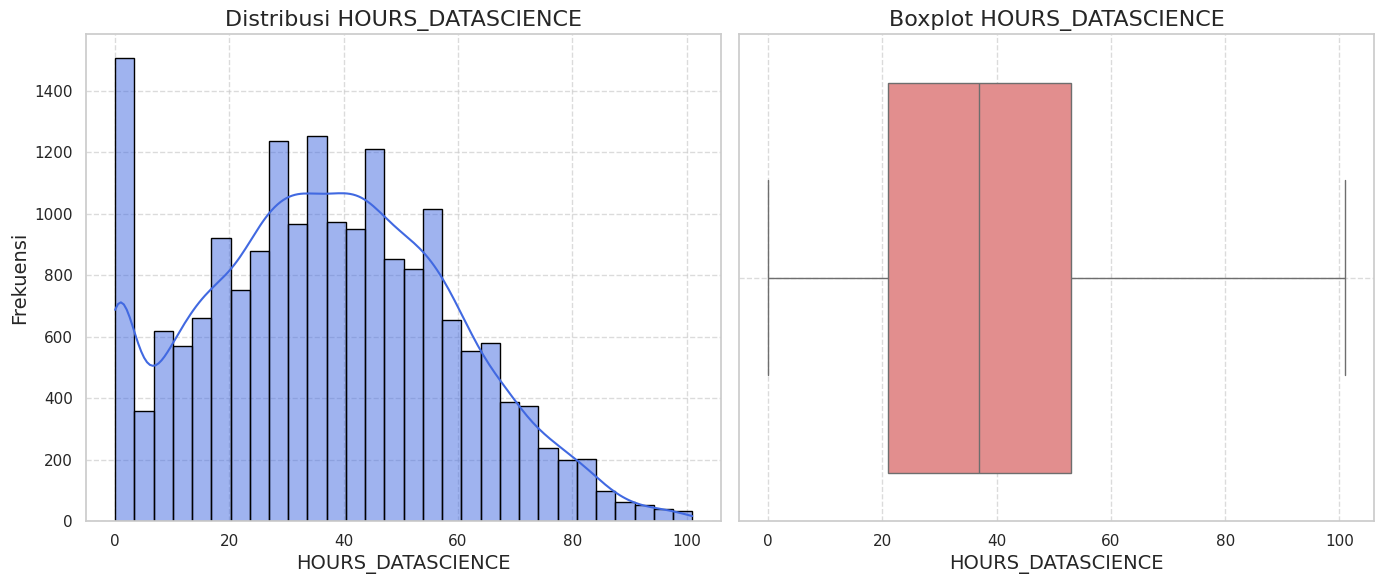

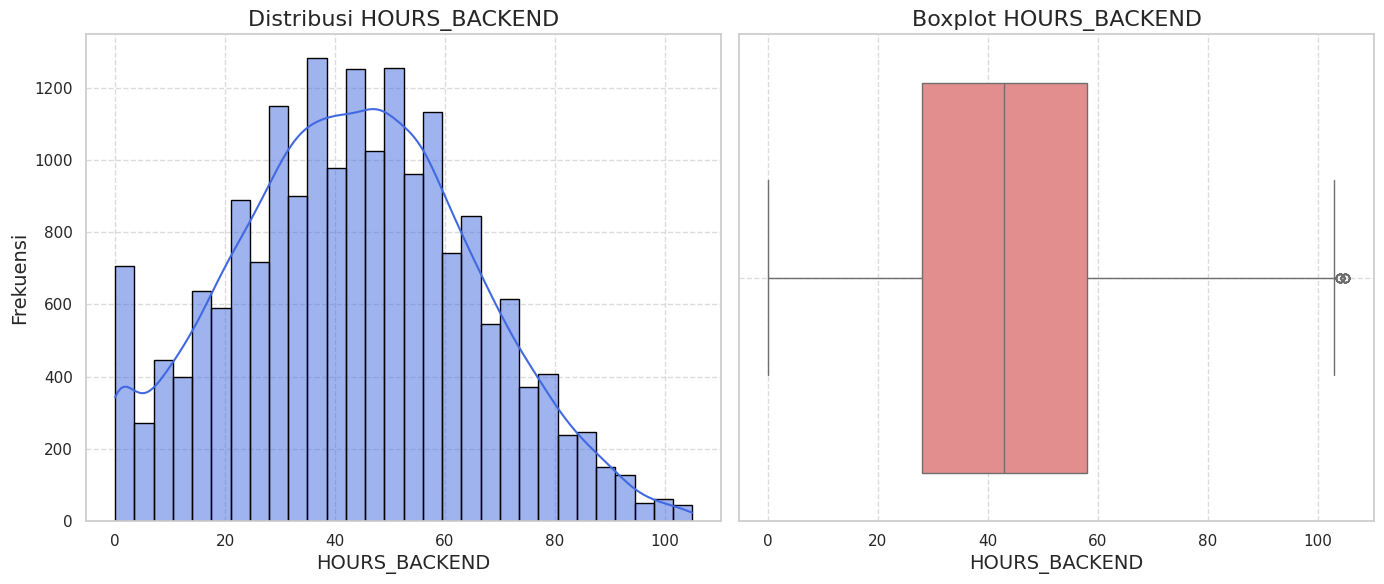

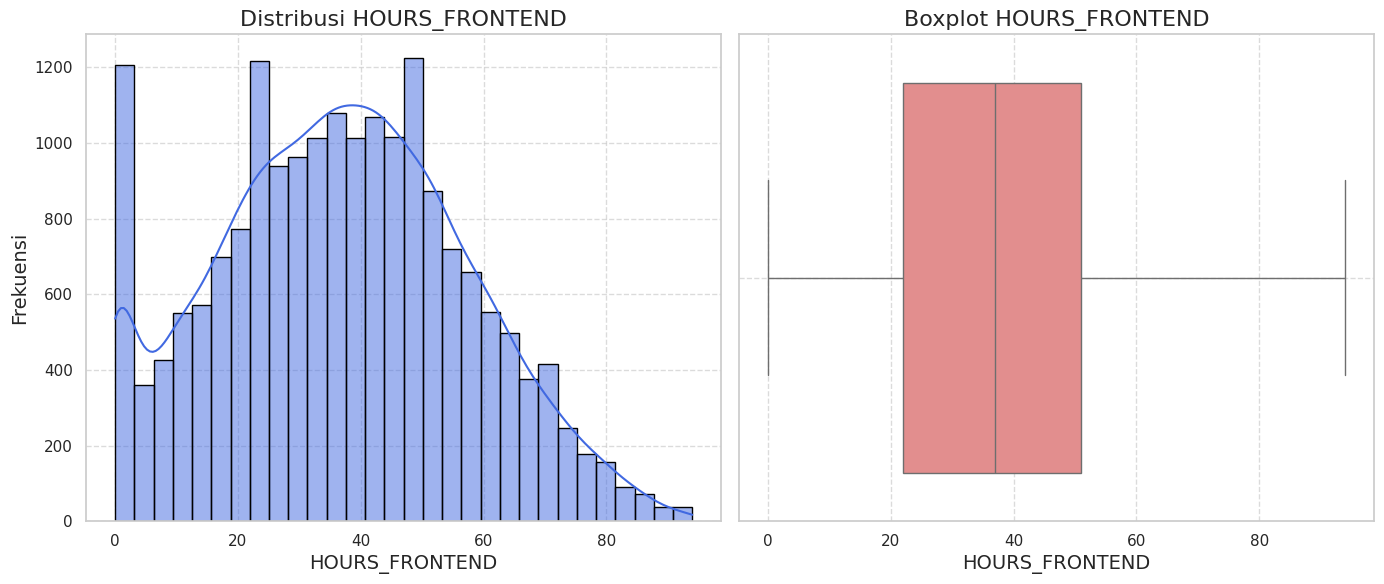

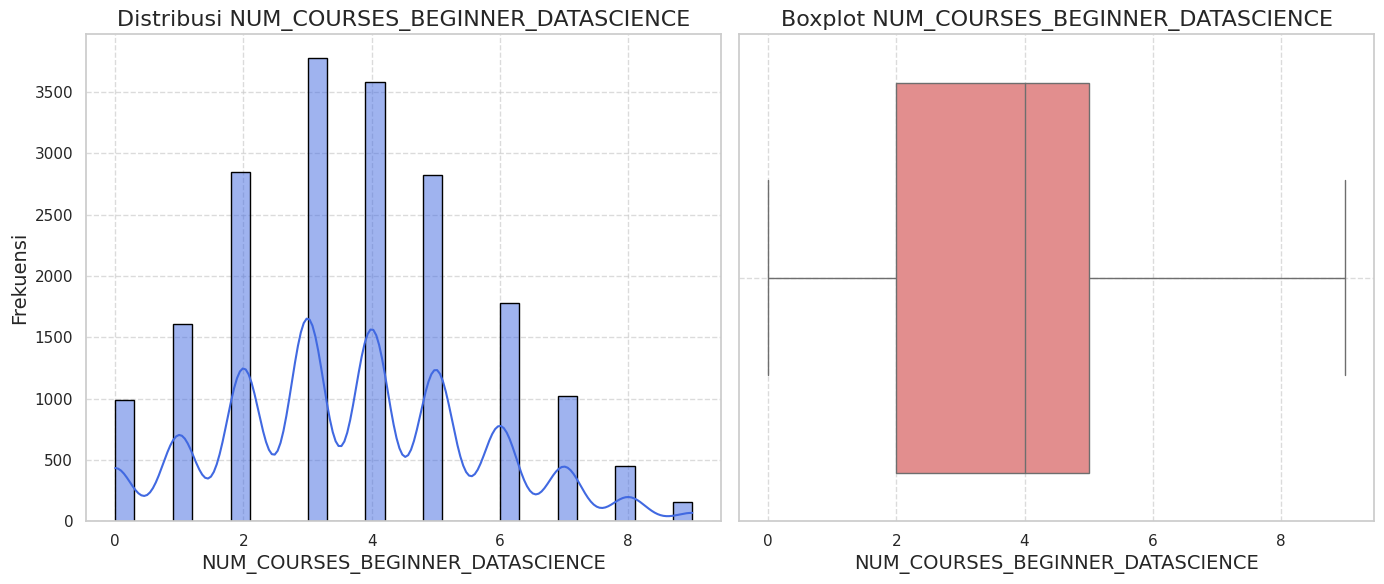

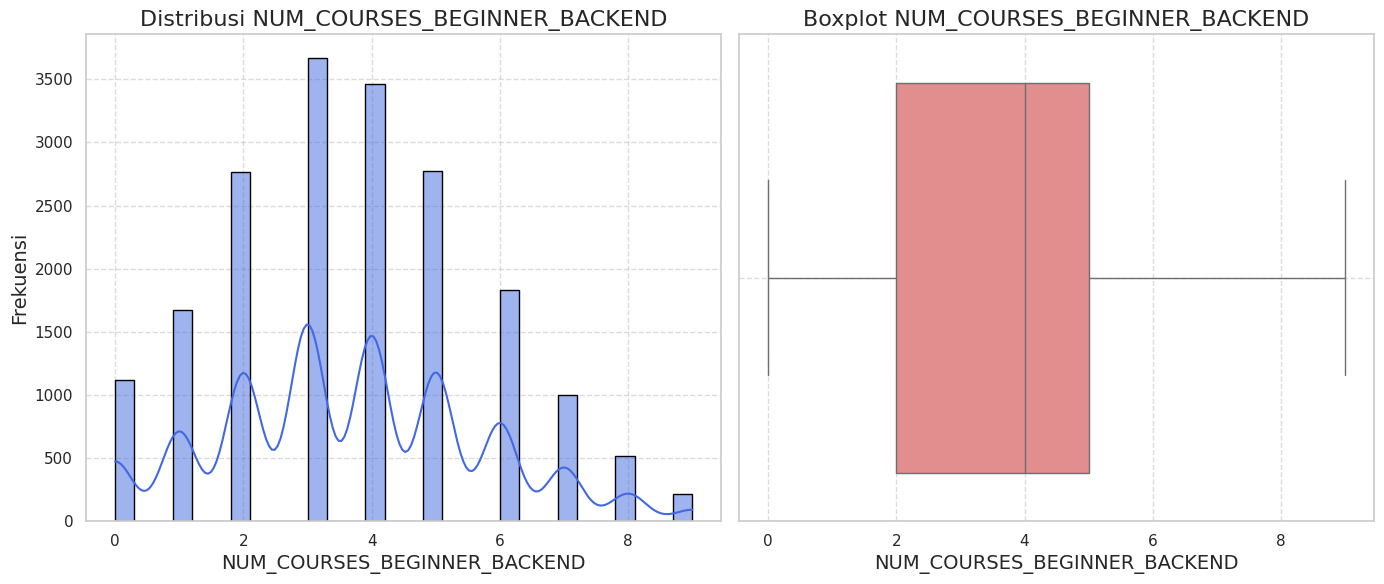

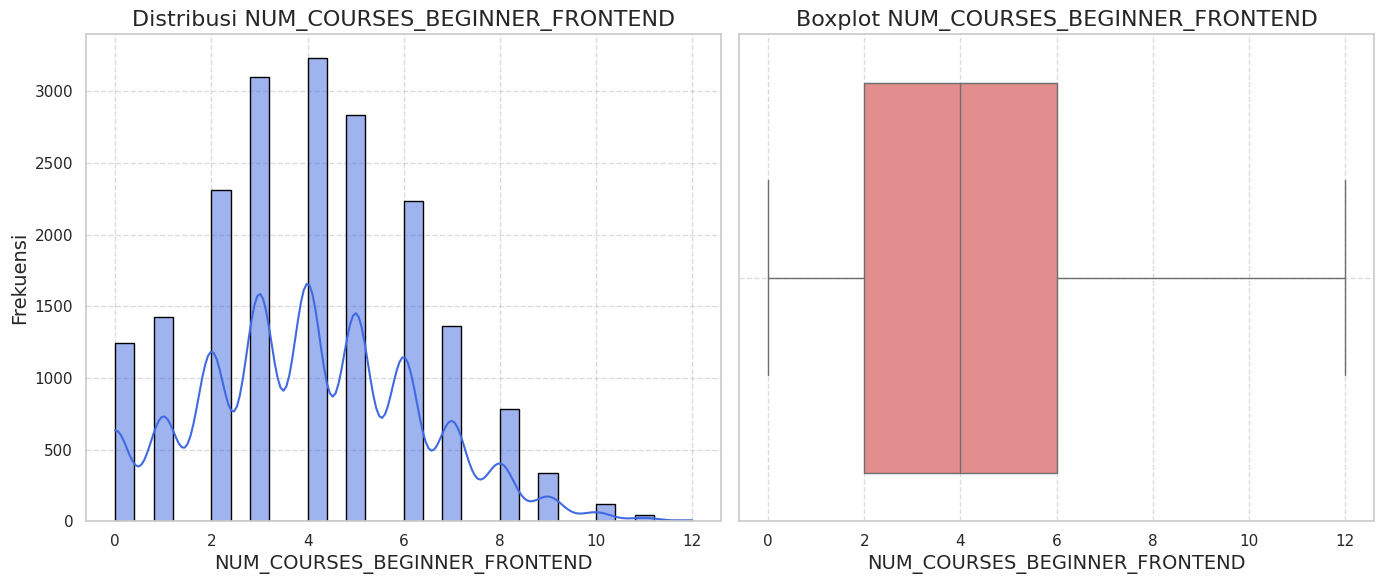

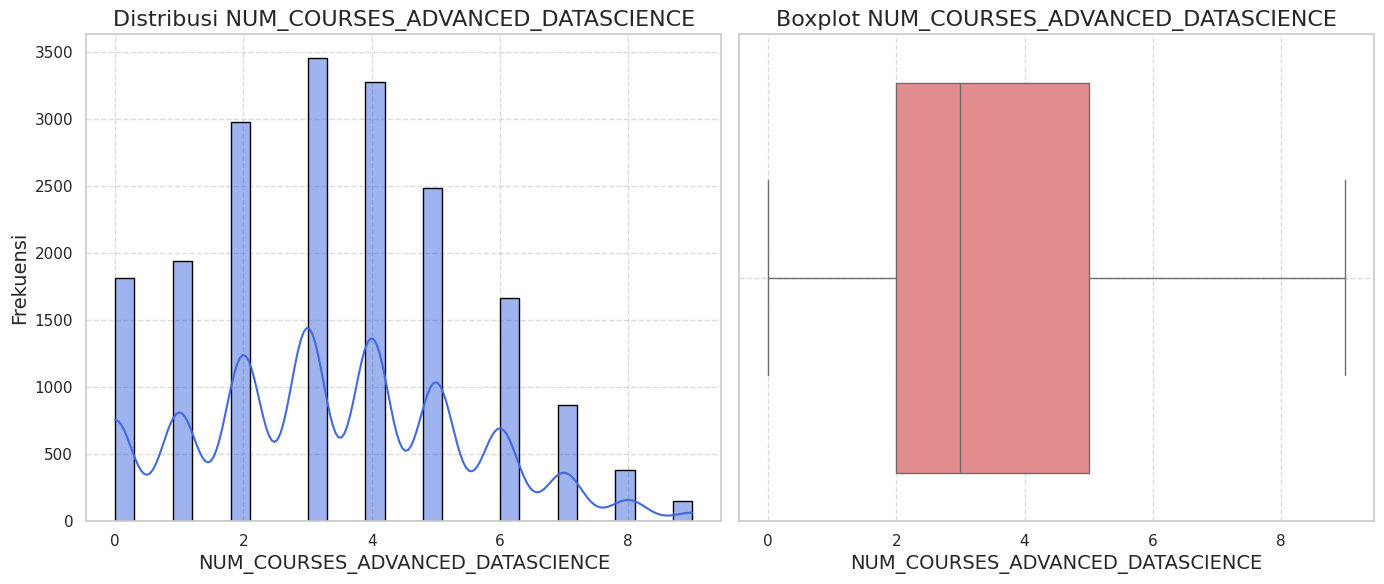

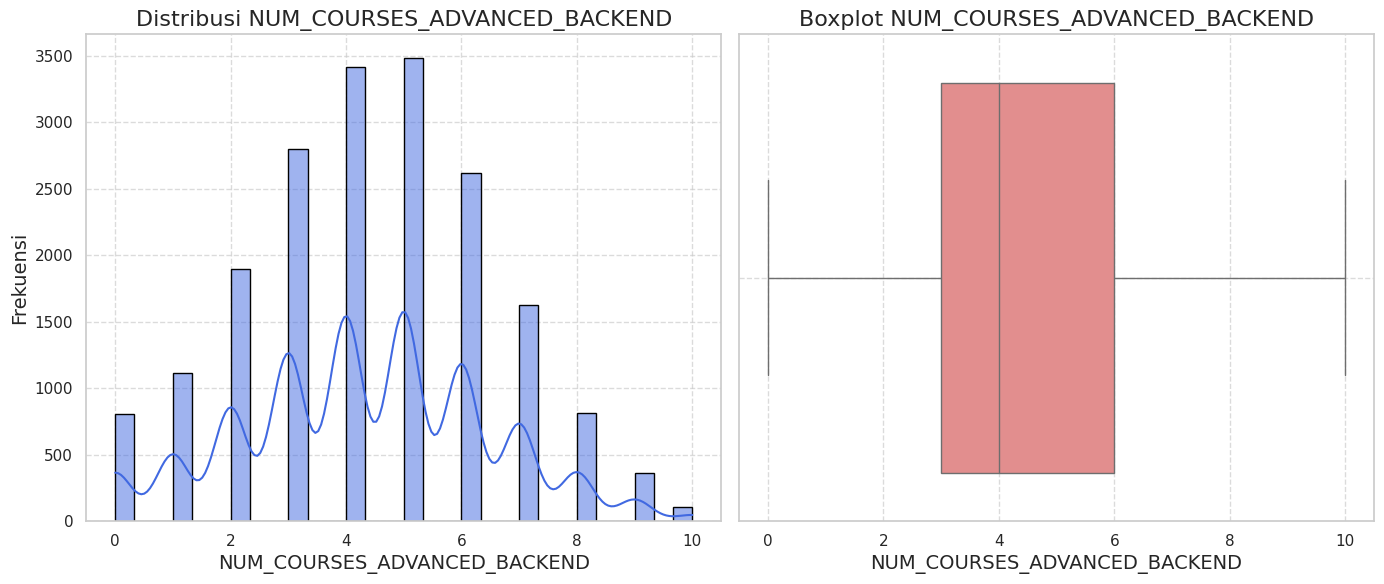

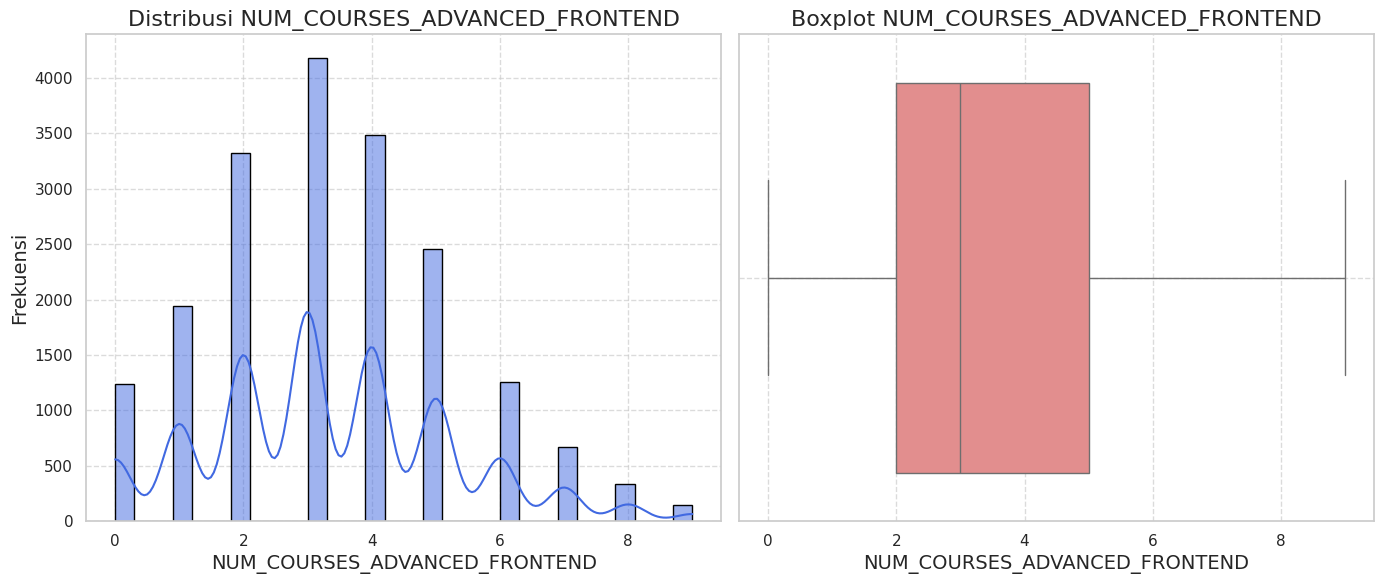

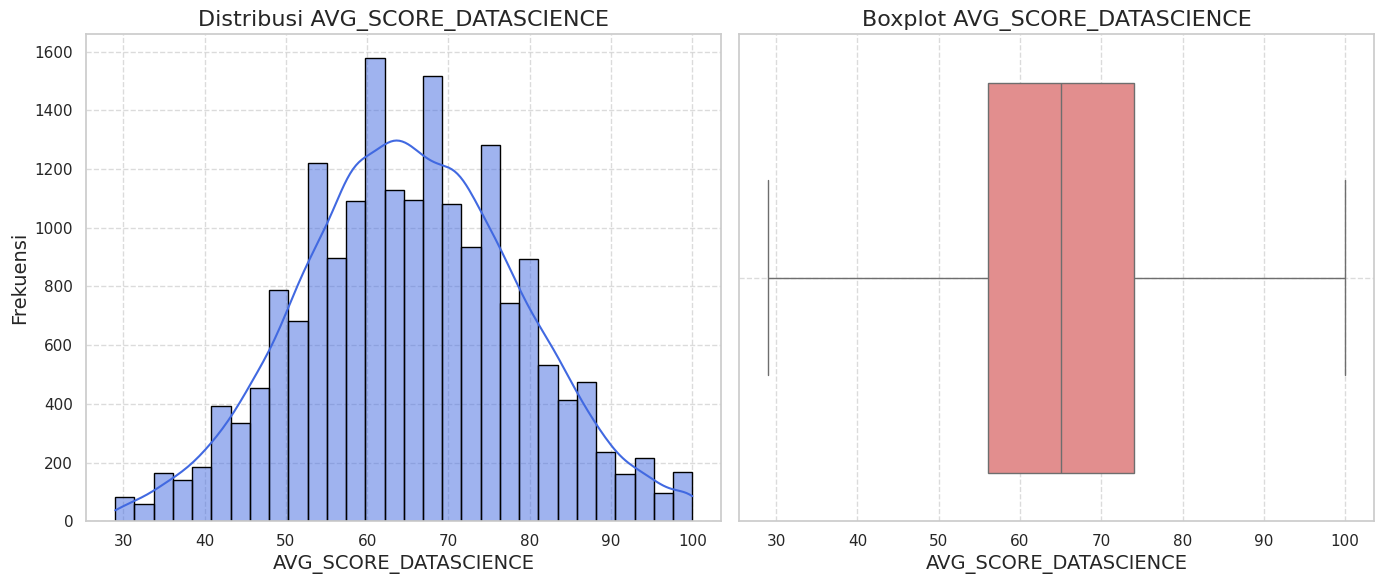

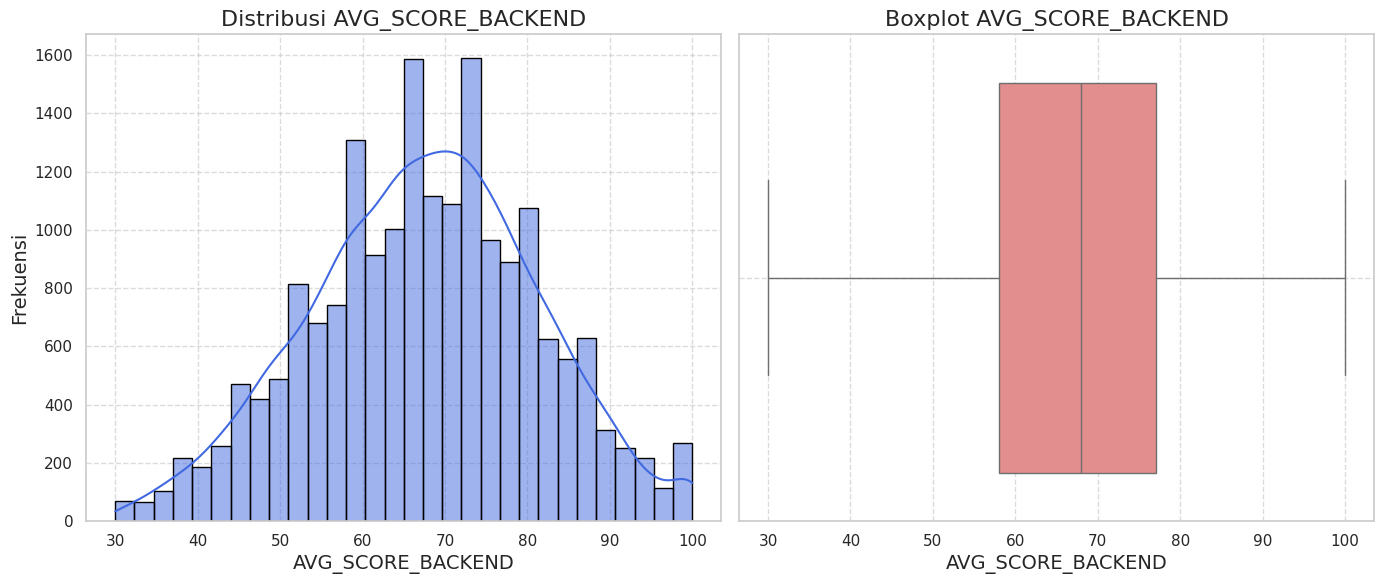

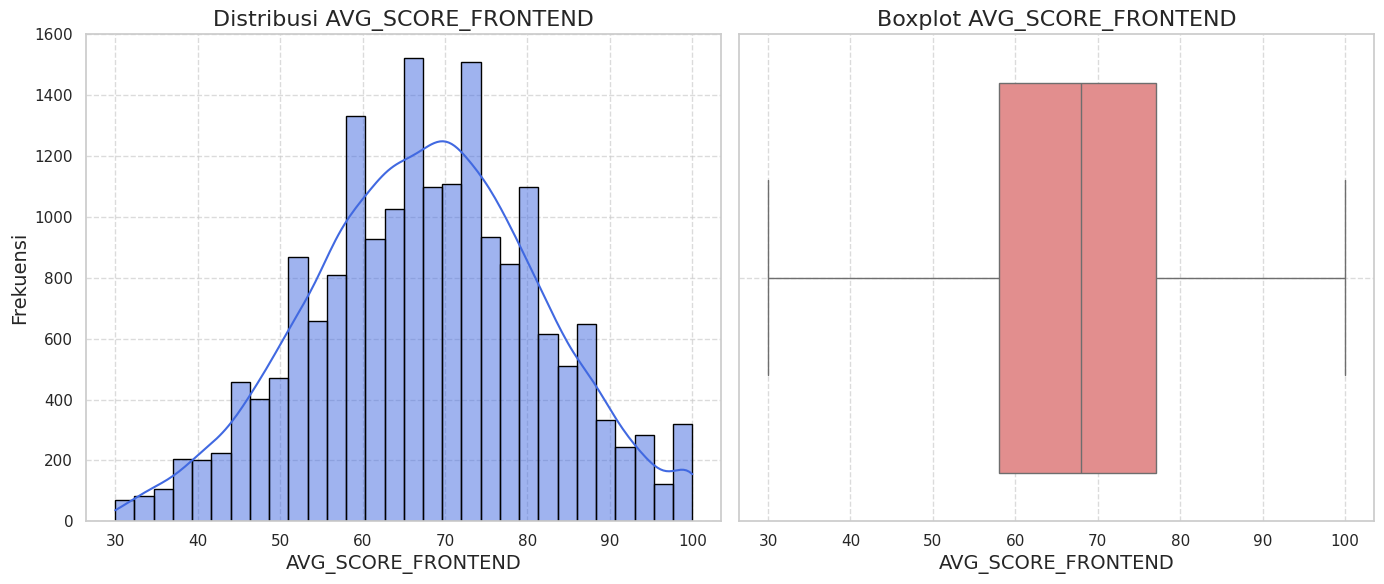

In [ ]:
def univariate_analysis(df, numeric_columns):

    # Set style dan warna
    sns.set(style="whitegrid", palette="pastel")

    for column in numeric_columns:
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30, kde=True, color="royalblue", edgecolor="black")
        plt.title(f'Distribusi {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frekuensi', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color="lightcoral")
        plt.title(f'Boxplot {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)

        plt.tight_layout()
        plt.show()


# Memanggil fungsi dengan dataset
univariate_analysis(pendidikan_cleaned, numeric_columns)

Univariate Analysis fokus pada analisis satu variabel pada satu waktu, memberikan wawasan tentang distribusi dan karakteristik data. Untuk variabel `HOURS_DATASCIENCE`, analisis dilakukan menggunakan histogram dan boxplot untuk mengeksplorasi distribusi data.

- Histogram

Histogram untuk `HOURS_DATASCIENCE` menunjukkan adanya skewness positif, yaitu distribusi data yang cenderung menjulur ke arah kanan. Ini berarti bahwa sebagian besar data terkonsentrasi di sisi kiri histogram, sementara ada sejumlah nilai yang lebih tinggi dan jarang di sisi kanan.

- Boxplot

Boxplot untuk `HOURS_DATASCIENCE` memperlihatkan bahwa whisker bagian kanan (sisi atas boxplot) lebih panjang dibandingkan whisker bagian kiri. Hal ini menunjukkan bahwa data memiliki skewness positif, dengan sebagian besar data terkumpul di bawah median dan beberapa nilai ekstrem yang menjulang jauh ke arah kanan. Panjang whisker yang tidak seimbang ini mencerminkan adanya nilai-nilai outlier atau data yang menyimpang di sisi kanan distribusi.

Analisis ini mengungkapkan bahwa variabel `HOURS_DATASCIENCE` tidak terdistribusi secara simetris, melainkan menunjukkan kecenderungan untuk memiliki beberapa nilai yang sangat tinggi, yang dapat mempengaruhi rata-rata dan memberikan wawasan tambahan tentang bagaimana data terdistribusi.

## *4.3 Bivariate Analysis*

Bivariate Analysis mengeksplorasi hubungan antara dua variabel. Ini bisa dilakukan dengan scatter plot, heatmap, dan correlation matrix.

In [ ]:
def scatter_plot_pairs(df, numeric_columns):

    num_columns = len(numeric_columns)

    if num_columns < 2:
        raise ValueError("Jumlah kolom numerik harus lebih dari satu untuk scatter plot.")

    # Generate all pairwise combinations of columns
    pairs = list(itertools.combinations(numeric_columns, 2))

    # Define number of rows and columns for subplots
    num_rows = (len(pairs) // 2) + (len(pairs) % 2)

    plt.figure(figsize=(14, num_rows * 5))

    # Create scatter plots for each pair
    for idx, (x_col, y_col) in enumerate(pairs):
        plt.subplot(num_rows, 2, idx + 1)
        sns.scatterplot(x=df[x_col], y=df[y_col], color="royalblue", edgecolor="black")
        plt.title(f'Scatter Plot {x_col} vs {y_col}', fontsize=12)
        plt.xlabel(x_col, fontsize=10)
        plt.ylabel(y_col, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Memanggil fungsi dengan dataset
scatter_plot_pairs(pendidikan_cleaned, numeric_columns)

Output hidden; open in https://colab.research.google.com to view.

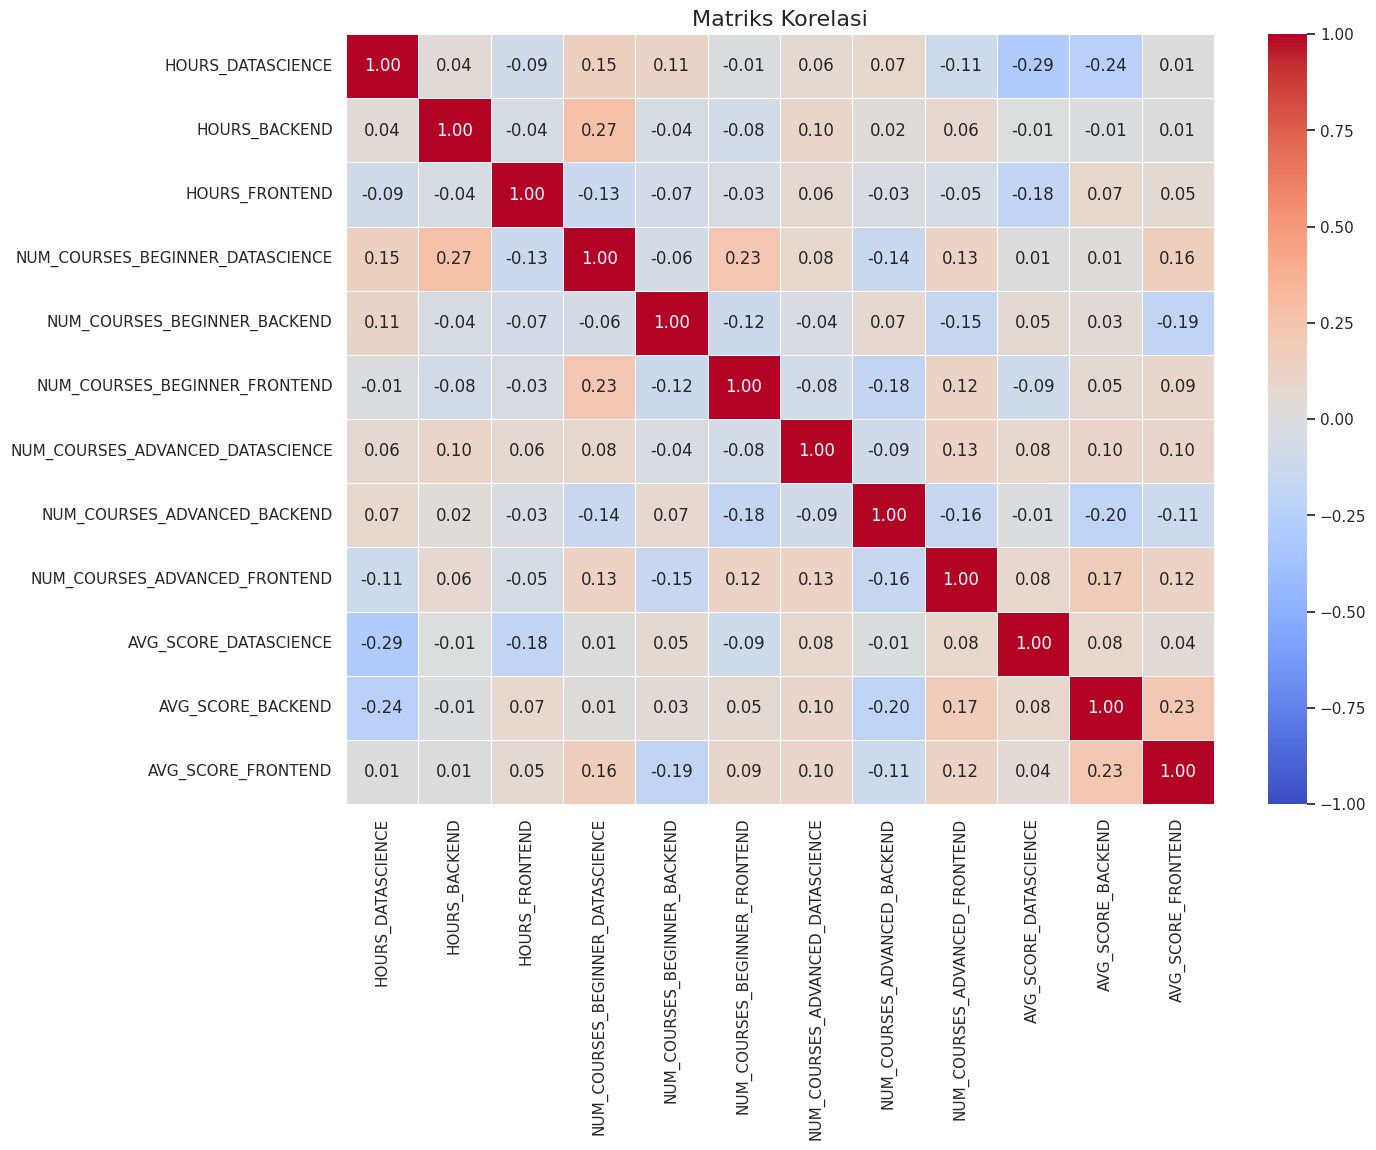

In [ ]:
def heatmap_correlation(df, numeric_columns):

    plt.figure(figsize=(14, 10))
    correlation_matrix = df[numeric_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Matriks Korelasi', fontsize=16)
    plt.show()

# Memanggil fungsi dengan dataset
heatmap_correlation(pendidikan_cleaned, numeric_columns)

In [ ]:
# Membuat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder pada kolom 'Profile'
pendidikan_cleaned['PROFILE_ENCODED'] = label_encoder.fit_transform(pendidikan_cleaned['PROFILE'])

<ipython-input-44-57b29c50c845>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


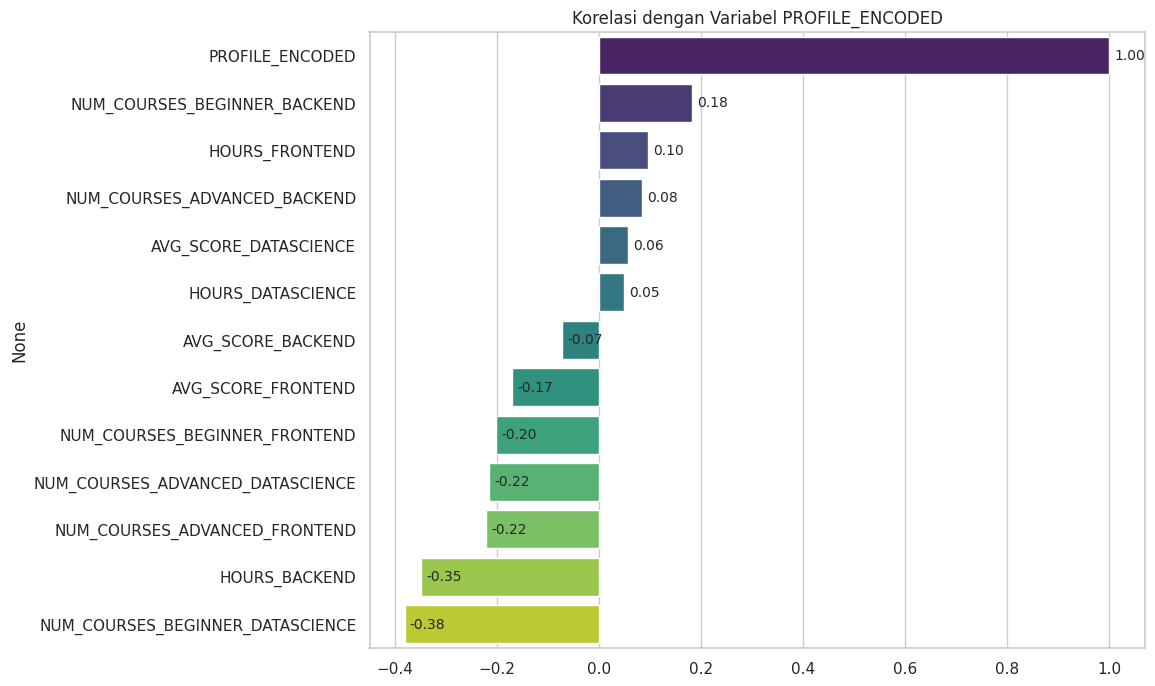

In [ ]:
def visualize_target_correlation(df, numeric_columns, target_column='PROFILE_ENCODED'):
    # Filter hanya kolom numerik yang diinginkan
    df_numeric = df[numeric_columns]

    # Menghitung matriks korelasi antara target_column dan semua kolom lain
    correlation_with_target = df_numeric.corr()[target_column].sort_values(ascending=False)

    # Menentukan ukuran gambar
    plt.figure(figsize=(10, 8))

    # Menampilkan bar plot korelasi dengan menambahkan nilai korelasi
    sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')

    # Menambahkan nilai korelasi pada setiap bar
    for i, value in enumerate(correlation_with_target.values):
        plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10)

    # Menyesuaikan tata letak
    plt.title(f'Korelasi dengan Variabel {target_column}')
    plt.show()

# Daftar kolom numerik
numeric_columns = [
    'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
    'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
    'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
    'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE_ENCODED'
]

# Panggil fungsi untuk menampilkan korelasi dengan 'PROFILE_ENCODED'
visualize_target_correlation(pendidikan_cleaned, numeric_columns)

pendidikan_cleaned = pendidikan_cleaned.drop(columns = 'PROFILE_ENCODED')


Bivariate Analysis menggunakan heatmap matriks korelasi untuk mengeksplorasi hubungan antara dua variabel. Hasil dari heatmap untuk variabel-variabel berikut memberikan wawasan tentang seberapa kuat dan arah hubungan antara pasangan-pasangan variabel.

Hubungan Korelasi:

1. **HOURS_DATASCIENCE dan AVG_SCORE_DATASCIENCE**:
   - **Korelasi: -0.29**
   - Terdapat hubungan negatif sedang antara jumlah jam yang dihabiskan untuk Data Science dan skor rata-rata Data Science. Ini menunjukkan bahwa semakin banyak jam yang dihabiskan untuk Data Science, semakin rendah skor rata-rata yang diperoleh. Meskipun hubungan ini tidak sangat kuat, ada indikasi bahwa waktu yang dihabiskan tidak selalu berbanding lurus dengan hasil skor yang lebih baik.

2. **HOURS_DATASCIENCE dan AVG_SCORE_BACKEND**:
   - **Korelasi: -0.29**
   - Hubungan negatif sedang juga ditemukan antara jumlah jam yang dihabiskan untuk Data Science dan skor rata-rata Backend. Artinya, waktu yang dihabiskan untuk Data Science mungkin memiliki dampak negatif atau tidak signifikan terhadap hasil skor di bidang Backend. Ini dapat menunjukkan bahwa keterlibatan dalam Data Science tidak berhubungan positif dengan kinerja di Backend.

3. **HOURS_BACKEND dan NUM_COURSES_BEGINNER_DATASCIENCE**:
   - **Korelasi: 0.27**
   - Ada hubungan positif sedang antara jam yang dihabiskan untuk Backend dan jumlah kursus pemula Data Science yang diambil. Korelasi positif ini menunjukkan bahwa individu yang menghabiskan lebih banyak waktu pada Backend cenderung mengambil lebih banyak kursus pemula di Data Science, mungkin karena mereka saling melengkapi atau karena mereka mengembangkan keterampilan dalam berbagai area.

4. **NUM_COURSES_BEGINNER_DATASCIENCE dan NUM_COURSES_BEGINNER_FRONTEND**:
   - **Korelasi: 0.27**
   - Hubungan positif sedang juga terlihat antara jumlah kursus pemula di Data Science dan jumlah kursus pemula di Frontend. Ini menunjukkan bahwa individu yang mengambil lebih banyak kursus pemula di Data Science juga cenderung mengambil kursus pemula di Frontend, menunjukkan adanya keterkaitan atau minat yang serupa dalam kursus pemula di berbagai bidang.

## **4.4 Multivariate Analysis**
Multivariate Analysis memeriksa hubungan antara lebih dari dua variabel sekaligus.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 1400x1000 with 0 Axes>

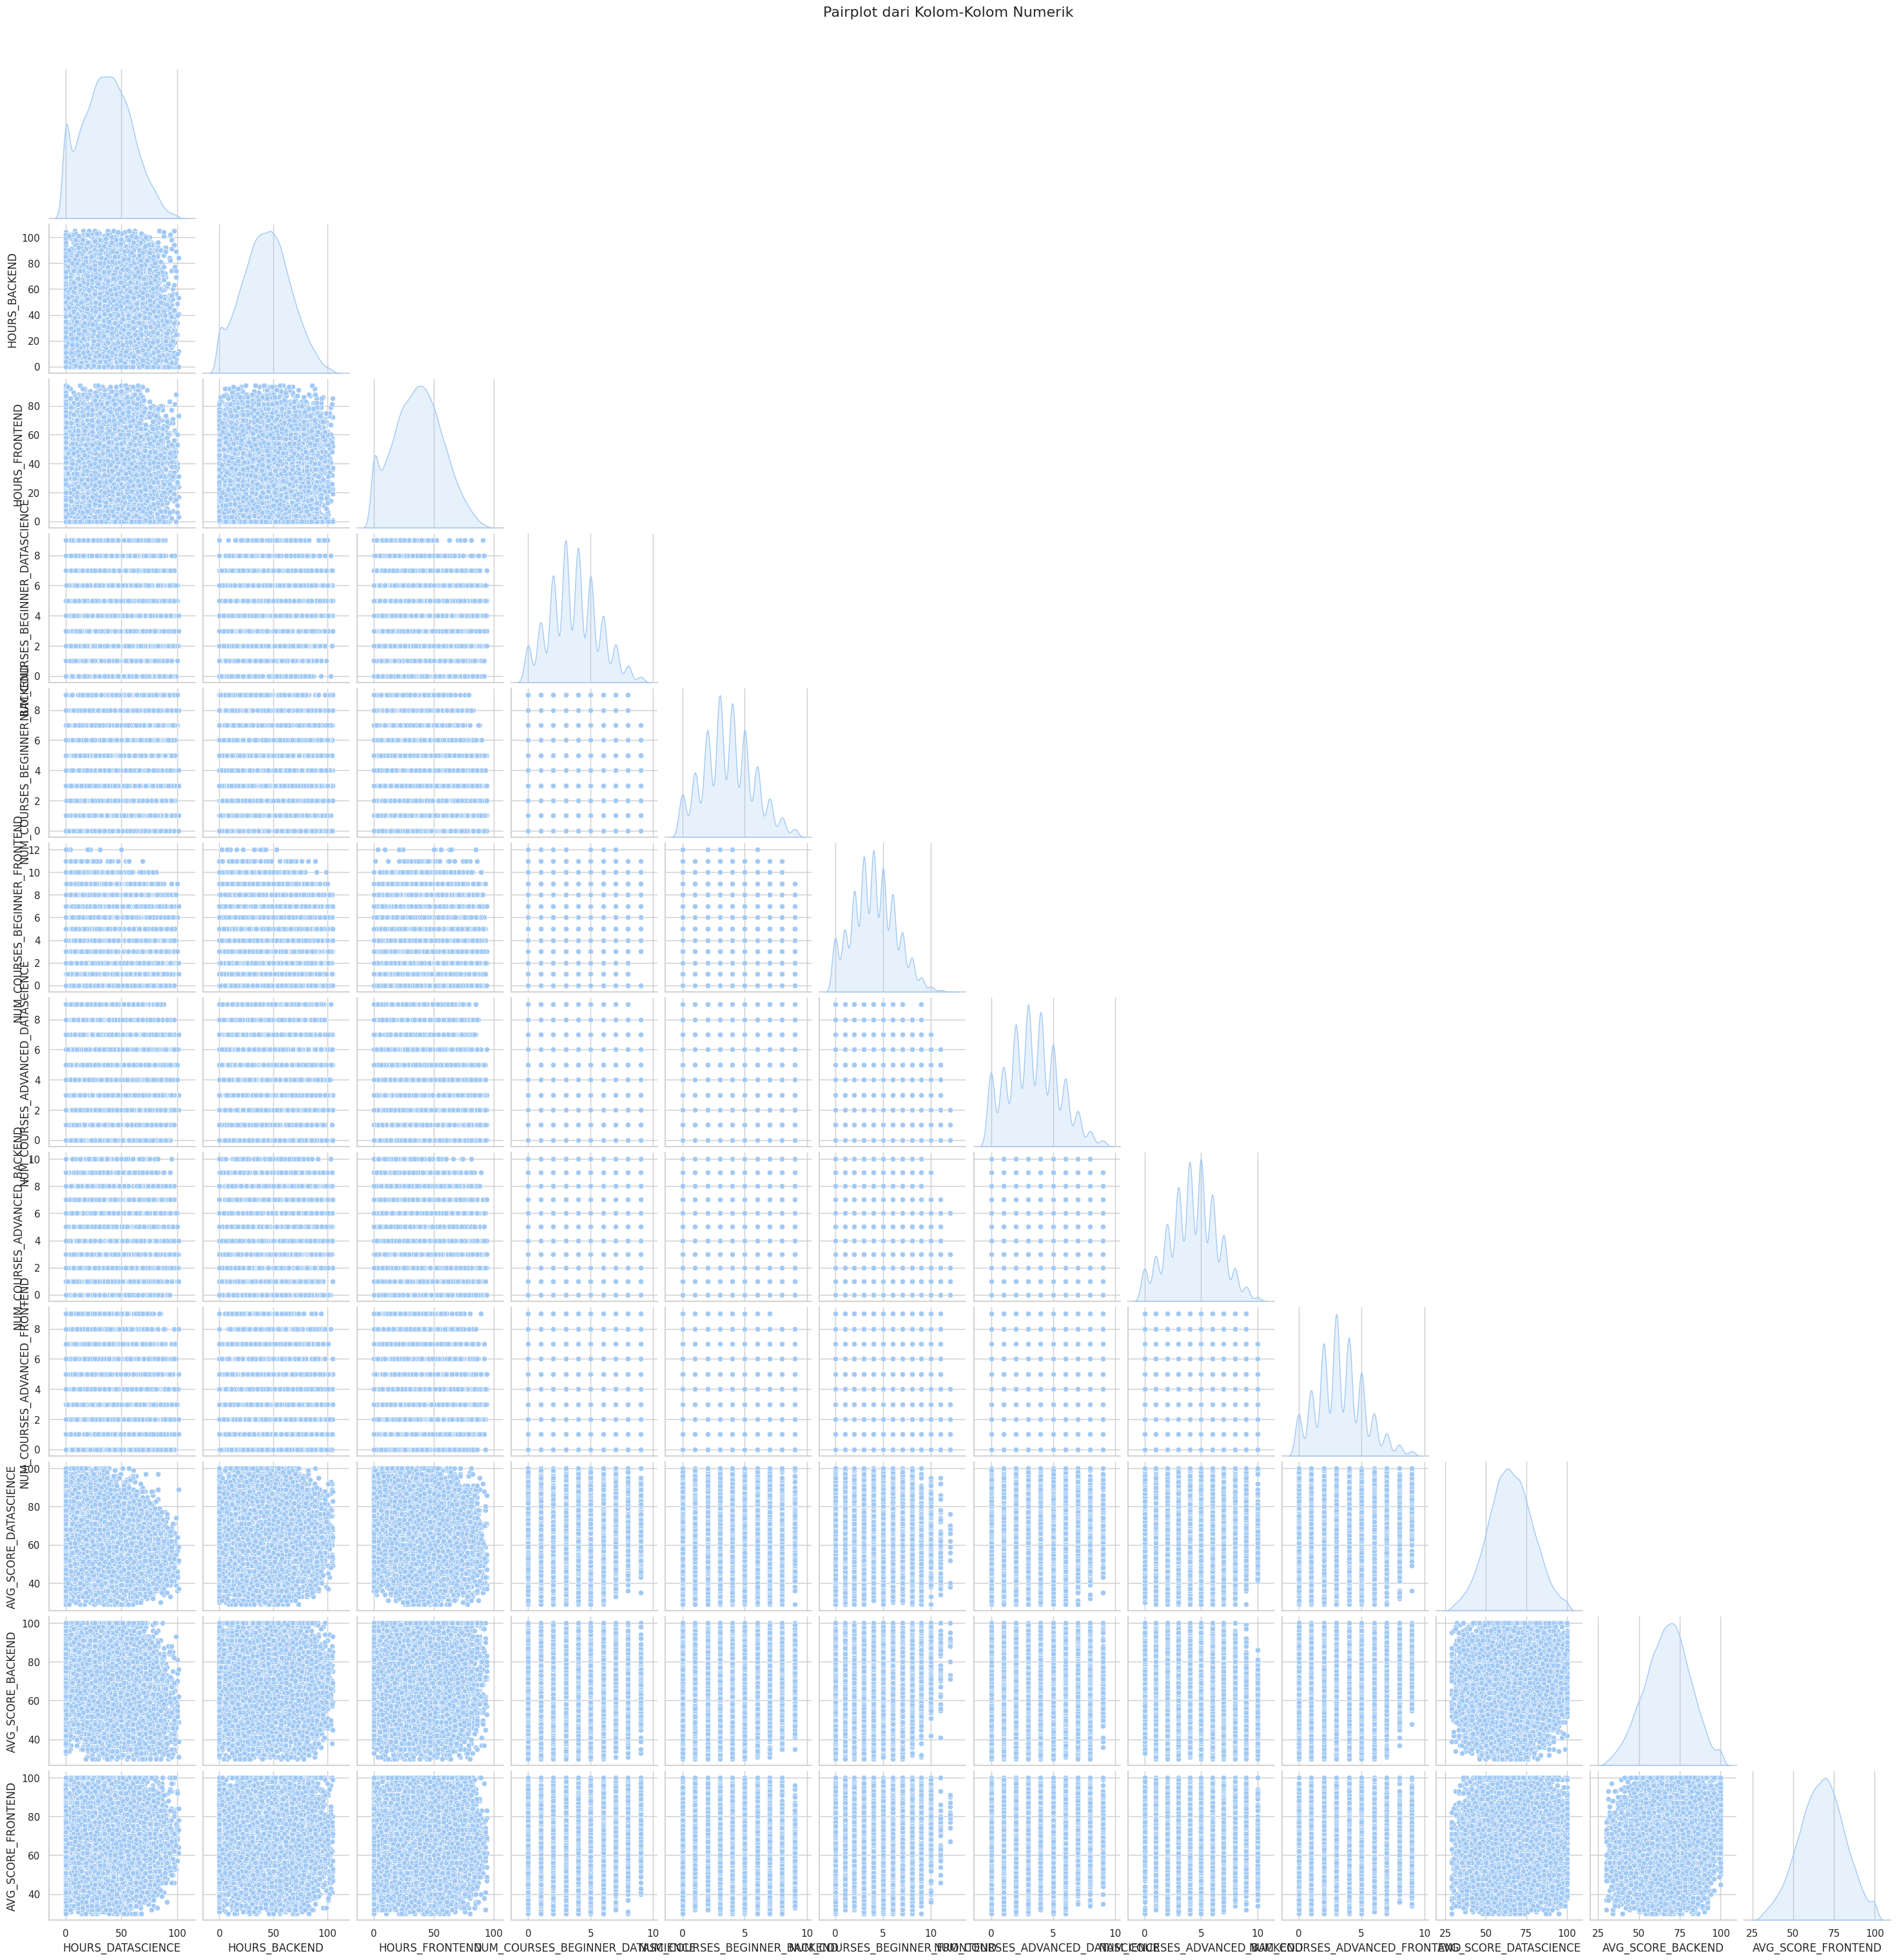

In [ ]:
def multivariate_analysis(df, numeric_columns):

    # Pairplot untuk visualisasi hubungan antara semua pasangan kolom
    plt.figure(figsize=(14, 10))
    sns.pairplot(df[numeric_columns], corner=True, diag_kind='kde', palette='husl')
    plt.suptitle('Pairplot dari Kolom-Kolom Numerik', fontsize=16, y=1.02)
    plt.show()

# Daftar kolom numerik
numeric_columns = [
    'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
    'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
    'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
    'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'
]

# Memanggil fungsi dengan dataset
multivariate_analysis(pendidikan_cleaned, numeric_columns)

Pairplot adalah alat visualisasi yang digunakan dalam analisis multivariat untuk mengeksplorasi hubungan antara semua pasangan variabel dalam dataset. Dengan membuat scatter plot untuk setiap pasangan variabel dan menampilkan distribusi variabel di sepanjang diagonal, pairplot memberikan gambaran menyeluruh tentang hubungan dan pola yang ada di dalam data.

# **5. Visualisasi Data**

In [ ]:
pendidikan_cleaned['PROFILE'].unique()

array(['advanced_backend', 'advanced_data_science', 'advanced_front_end',
       'beginner_data_science', 'beginner_front_end', 'beginner_backend'],
      dtype=object)

In [ ]:
AFBF = pendidikan_cleaned[pendidikan_cleaned['PROFILE'].isin(['advanced_front_end', 'beginner_front_end'])]
ABBB = pendidikan_cleaned[pendidikan_cleaned['PROFILE'].isin(['advanced_backend', 'beginner_backend'])]
ADBD = pendidikan_cleaned[pendidikan_cleaned['PROFILE'].isin(['advanced_data_science', 'beginner_data_science'])]

In [ ]:
pendidikan_cleaned.columns

Index(['NAME', 'USER_ID', 'HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND', 'NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND', 'AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND', 'PROFILE'],
      dtype='object')

## *5.1 Proporsi Profile*

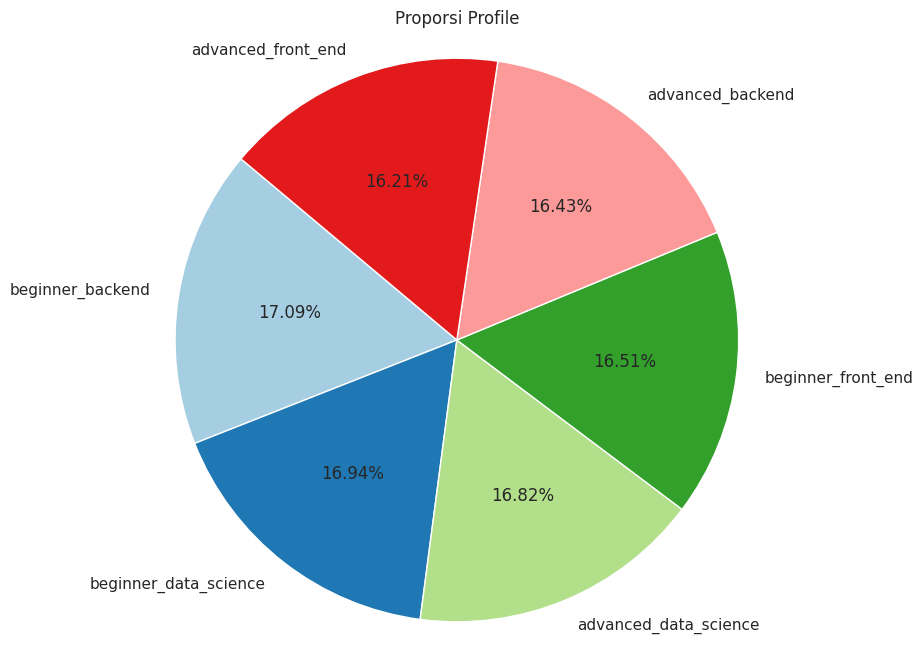

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(pendidikan_cleaned['PROFILE'].value_counts(), labels=pendidikan_cleaned['PROFILE'].value_counts().index, autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi Profile')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Proporsi Profil Siswa
Bagian pertama dari dashboard ini adalah diagram lingkaran yang menunjukkan proporsi dari masing-masing profil siswa yang mengikuti kursus. Profil-profil tersebut adalah:

Beginner Front-End: 16.51%
Beginner Back-End: 17.09%
Beginner Data Science: 16.94%
Advanced Front-End: 16.21%
Advanced Back-End: 16.43%
Advanced Data Science: 16.82%
Proporsi ini menunjukkan distribusi yang relatif merata di antara berbagai profil siswa, dengan sedikit perbedaan di antaranya.


## *5.2 Perbandingan Rata-Rata Spend Time*

In [ ]:
hours = pd.pivot_table(pendidikan_cleaned,index='PROFILE',values=['HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND'],aggfunc='mean')
hours

HOURS_BACKEND  HOURS_DATASCIENCE  HOURS_FRONTEND
PROFILE                                                                
advanced_backend           49.952366          32.390985       29.929668
advanced_data_science      49.515776          49.483286       30.541393
advanced_front_end         50.243357          30.838302       50.000972
beginner_backend           49.708884          31.135567       30.875500
beginner_data_science      30.166822          30.324651       49.276279
beginner_front_end         30.427753          48.536601       30.282304

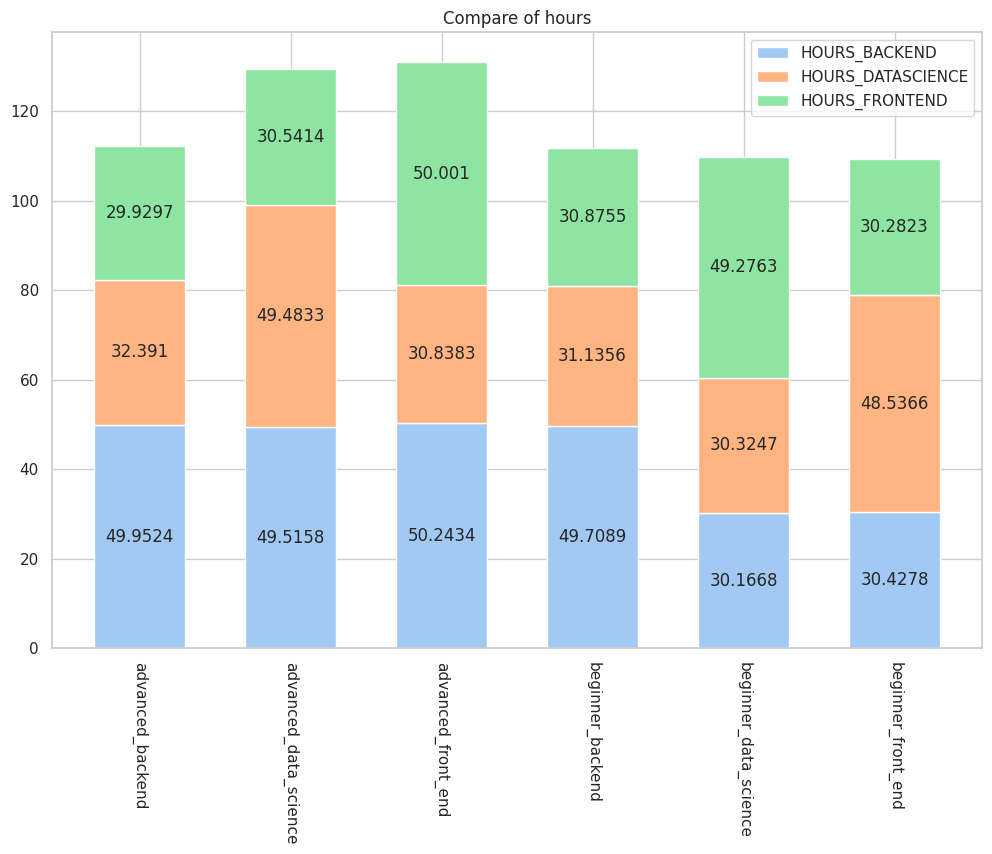

In [ ]:
profil = hours.index.tolist()
hours_counts = {
    'HOURS_BACKEND': hours['HOURS_BACKEND'].values,
    'HOURS_DATASCIENCE': hours['HOURS_DATASCIENCE'].values,
    'HOURS_FRONTEND' : hours['HOURS_FRONTEND'].values
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(6)

for i, i_count in hours_counts.items():
    p = ax.bar(profil, i_count, width, label=i, bottom=bottom)
    bottom += i_count

    ax.bar_label(p, label_type='center')

ax.set_title('Compare of hours')
ax.legend()
plt.xticks(rotation=270)
plt.show()

In [ ]:
profil = hours.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=hours['HOURS_BACKEND'].values.tolist(),
    name='HOURS_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=hours['HOURS_DATASCIENCE'].values.tolist(),
    name='HOURS_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=hours['HOURS_FRONTEND'].values.tolist(),
    name='HOURS_FRONTEND',
    marker_color='yellow'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Perbandingan Rata-Rata Waktu yang Dihabiskan Tiap Profil Saat Melakukan Kursus
Grafik batang ini menunjukkan perbandingan rata-rata waktu (dalam jam) yang dihabiskan oleh setiap profil siswa dalam mengikuti kursus:

Advanced Back-End: Menghabiskan sekitar 49.95 jam untuk backend, 32.39 jam untuk data science, dan 29.93 jam untuk front-end.
Beginner Back-End: Menghabiskan sekitar 49.71 jam untuk backend, 31.14 jam untuk data science, dan 30.88 jam untuk front-end.
Advanced Data Science: Menghabiskan sekitar 49.52 jam untuk backend, 30.54 jam untuk data science, dan 30.17 jam untuk front-end.
Beginner Data Science: Menghabiskan sekitar 49.48 jam untuk backend, 30.32 jam untuk data science, dan 30.32 jam untuk front-end.
Advanced Front-End: Menghabiskan sekitar 49.28 jam untuk backend, 50.24 jam untuk data science, dan 30.84 jam untuk front-end.
Beginner Front-End: Menghabiskan sekitar 48.54 jam untuk backend, 30.43 jam untuk data science, dan 30.28 jam untuk front-end.
Data ini menunjukkan bahwa siswa dengan profil advanced cenderung menghabiskan waktu lebih banyak dalam kursus mereka dibandingkan dengan siswa dengan profil beginner, terutama pada kursus backend.

## *5.3 Perbandingan Rata-Rata Jumlah Course*

In [ ]:
num = pd.pivot_table(pendidikan_cleaned,index='PROFILE',values=['NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND'],aggfunc='mean')
num

NUM_COURSES_ADVANCED_BACKEND  \
PROFILE                                               
advanced_backend                           3.043159   
advanced_data_science                      4.915027   
advanced_front_end                         5.011017   
beginner_backend                           4.995389   
beginner_data_science                      3.032248   
beginner_front_end                         4.940802   

                       NUM_COURSES_ADVANCED_DATASCIENCE  \
PROFILE                                                   
advanced_backend                               4.932545   
advanced_data_science                          3.000937   
advanced_front_end                             3.128645   
beginner_backend                               3.128189   
beginner_data_science                          3.063256   
beginner_front_end                             3.050605   

                       NUM_COURSES_ADVANCED_FRONTEND  \
PROFILE                                                
advanced_backend                            4.881074   
advanced_data_science                       2.962824   
advanced_front_end                          3.013934   
beginner_backend                            3.090378   
beginner_data_science                       3.041550   
beginner_front_end                          3.078612   

                       NUM_COURSES_BEGINNER_BACKEND  \
PROFILE                                               
advanced_backend                           3.049872   
advanced_data_science                      3.021556   
advanced_front_end                         4.970512   
beginner_backend                           3.119582   
beginner_data_science                      3.042481   
beginner_front_end                         4.937619   

                       NUM_COURSES_BEGINNER_DATASCIENCE  \
PROFILE                                                   
advanced_backend                               4.936061   
advanced_data_science                          5.007810   
advanced_front_end                             2.969216   
beginner_backend                               3.055334   
beginner_data_science                          3.018605   
beginner_front_end                             3.049332   

                       NUM_COURSES_BEGINNER_FRONTEND  
PROFILE                                               
advanced_backend                            4.913043  
advanced_data_science                       5.020619  
advanced_front_end                          3.069021  
beginner_backend                            3.038733  
beginner_data_science                       5.030078  
beginner_front_end                          3.030554

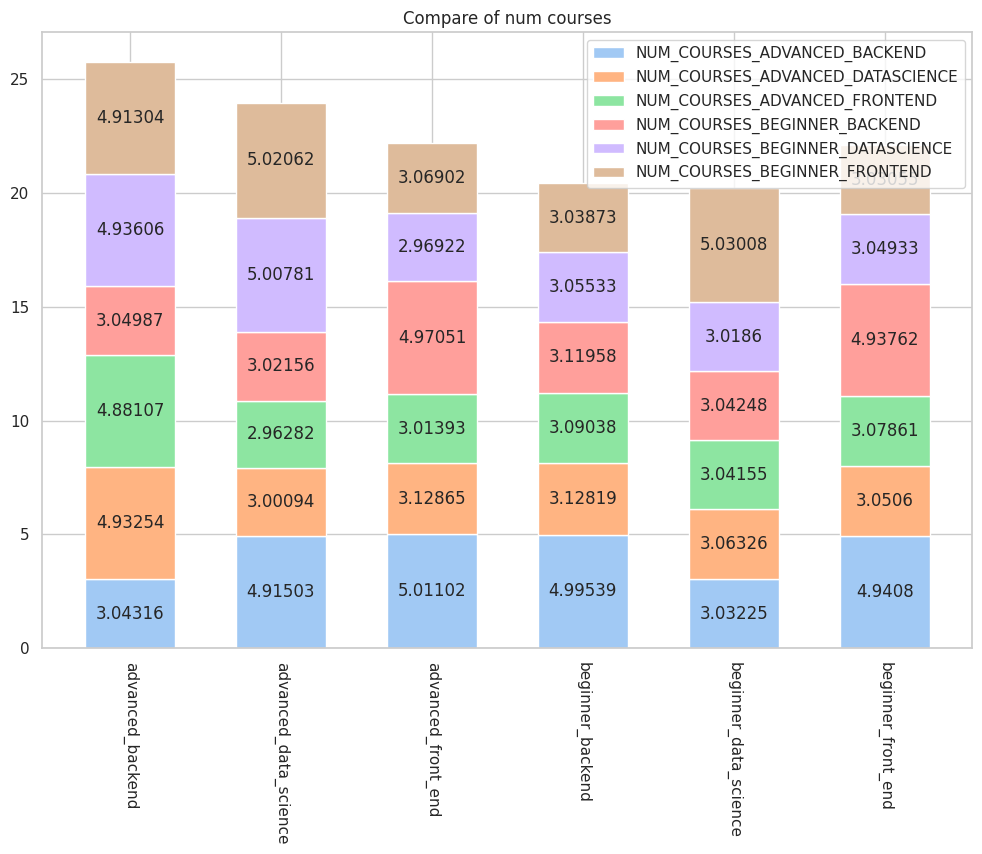

In [ ]:
profil = num.index.tolist()
hours_counts = {
    'NUM_COURSES_ADVANCED_BACKEND': num['NUM_COURSES_ADVANCED_BACKEND'].values,
    'NUM_COURSES_ADVANCED_DATASCIENCE': num['NUM_COURSES_ADVANCED_DATASCIENCE'].values,
    'NUM_COURSES_ADVANCED_FRONTEND' : num['NUM_COURSES_ADVANCED_FRONTEND'].values,
    'NUM_COURSES_BEGINNER_BACKEND': num['NUM_COURSES_BEGINNER_BACKEND'].values,
    'NUM_COURSES_BEGINNER_DATASCIENCE': num['NUM_COURSES_BEGINNER_DATASCIENCE'].values,
    'NUM_COURSES_BEGINNER_FRONTEND' : num['NUM_COURSES_BEGINNER_FRONTEND'].values
}
width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(6)

for i, i_count in hours_counts.items():
    p = ax.bar(profil, i_count, width, label=i, bottom=bottom)
    bottom += i_count

    ax.bar_label(p, label_type='center')

ax.set_title('Compare of num courses')
ax.legend()
plt.xticks(rotation=270)
plt.show()

In [ ]:
profil = num.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_ADVANCED_BACKEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_ADVANCED_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_ADVANCED_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_ADVANCED_FRONTEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_FRONTEND',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_BEGINNER_BACKEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_BACKEND',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_BEGINNER_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_BEGINNER_DATASCIENCE',
    marker_color='brown'
))
fig.add_trace(go.Bar(
    x=profil,
    y=num['NUM_COURSES_BEGINNER_FRONTEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_FRONTEND',
    marker_color='green'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Perbandingan Rata-Rata Jumlah Kursus yang Diikuti Tiap Profil
Bagian terakhir dari dashboard adalah grafik batang yang menunjukkan rata-rata jumlah kursus yang diikuti oleh setiap profil siswa:

Advanced Back-End: Rata-rata mengikuti sekitar 4.933 kursus.
Advanced Data Science: Rata-rata mengikuti sekitar 4.936 kursus.
Advanced Front-End: Rata-rata mengikuti sekitar 4.971 kursus.
Beginner Back-End: Rata-rata mengikuti sekitar 3.128 kursus.
Beginner Data Science: Rata-rata mengikuti sekitar 3.093 kursus.
Beginner Front-End: Rata-rata mengikuti sekitar 3.079 kursus.
Rata-rata ini menunjukkan bahwa siswa dengan profil advanced cenderung mengikuti lebih banyak kursus dibandingkan dengan siswa beginner.

## *5.4 Perbandingan Rata-Rata Nilai*

In [ ]:
avgscore = pd.pivot_table(pendidikan_cleaned,index='PROFILE',values=['AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],aggfunc='mean')
avgscore

AVG_SCORE_BACKEND  AVG_SCORE_DATASCIENCE  \
PROFILE                                                           
advanced_backend               71.409207              71.319054   
advanced_data_science          59.264917              58.743830   
advanced_front_end             71.045366              59.480233   
beginner_backend               71.572395              71.340916   
beginner_data_science          71.701395              59.109457   
beginner_front_end             59.520051              71.893380   

                       AVG_SCORE_FRONTEND  
PROFILE                                    
advanced_backend                71.255754  
advanced_data_science           71.695095  
advanced_front_end              59.411860  
beginner_backend                71.568706  
beginner_data_science           71.905426  
beginner_front_end              58.846913

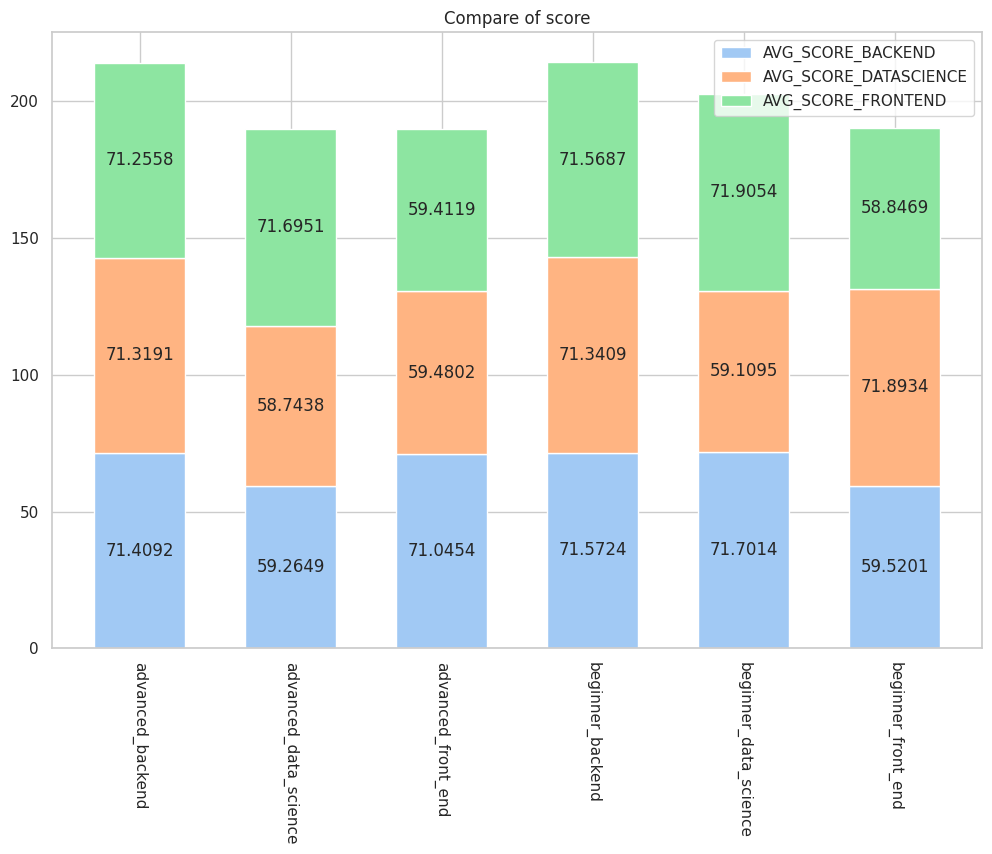

In [ ]:
profil = avgscore.index.tolist()
hours_counts = {
    'AVG_SCORE_BACKEND': avgscore['AVG_SCORE_BACKEND'].values,
    'AVG_SCORE_DATASCIENCE': avgscore['AVG_SCORE_DATASCIENCE'].values,
    'AVG_SCORE_FRONTEND' : avgscore['AVG_SCORE_FRONTEND'].values
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots(figsize=(12, 8))
bottom = np.zeros(6)

for i, i_count in hours_counts.items():
    p = ax.bar(profil, i_count, width, label=i, bottom=bottom)
    bottom += i_count

    ax.bar_label(p, label_type='center')

ax.set_title('Compare of score')
ax.legend()
plt.xticks(rotation=270)
plt.show()

In [ ]:
profil = avgscore.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=avgscore['AVG_SCORE_BACKEND'].values,
    name='AVG_SCORE_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=avgscore['AVG_SCORE_DATASCIENCE'].values,
    name='AVG_SCORE_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=avgscore['AVG_SCORE_FRONTEND'].values,
    name='AVG_SCORE_FRONTEND',
    marker_color='yellow'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

Perbandingan Rata-Rata Nilai Tiap Course pada Tiap Profil
Grafik batang di bagian ini membandingkan rata-rata nilai yang diperoleh oleh setiap profil siswa dalam kursus yang berbeda. Data yang ditampilkan adalah rata-rata nilai untuk kursus Backend, Data Science, dan Front-End:

Advanced Back-End: Nilai rata-rata berkisar di sekitar 71.26-71.41.
Beginner Back-End: Nilai rata-rata berkisar di sekitar 71.34-71.57.
Advanced Data Science: Nilai rata-rata berkisar di sekitar 58.74-59.26.
Beginner Data Science: Nilai rata-rata berkisar di sekitar 59.11-71.91.
Advanced Front-End: Nilai rata-rata berkisar di sekitar 59.48-71.05.
Beginner Front-End: Nilai rata-rata berkisar di sekitar 58.85-71.89.
Perbandingan ini mengindikasikan bahwa siswa pada profil backend, baik beginner maupun advanced, cenderung mendapatkan nilai yang lebih tinggi dibandingkan dengan profil lainnya.


## *5.5 Focus on Backend*

### *5.5.1 Perbandingan Rata-Rata waktu belajar dari Advance dan Beginner*

In [ ]:
ahh = pd.pivot_table(ABBB,index='PROFILE',values=['HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND'],aggfunc='mean')

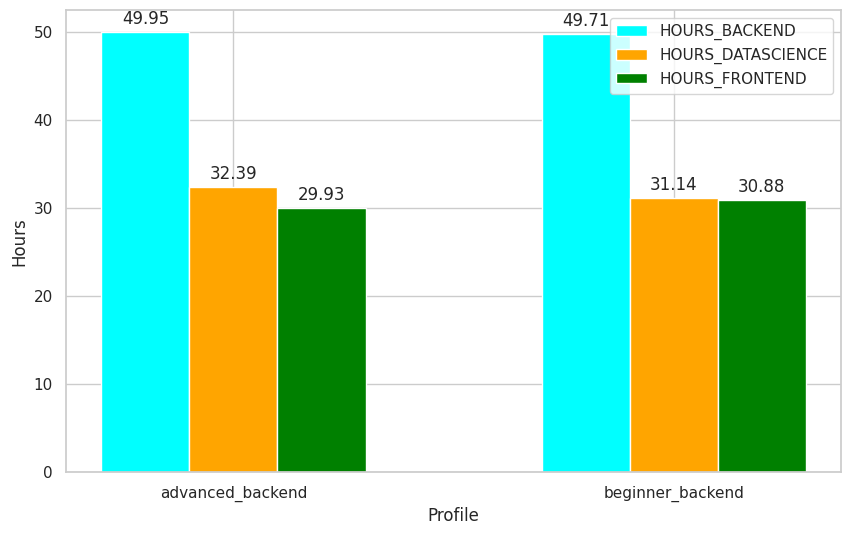

In [ ]:
x = np.arange(len(ahh))  # Menggunakan panjang DataFrame untuk x
y1 = ahh['HOURS_BACKEND'].tolist()
y2 = ahh['HOURS_DATASCIENCE'].tolist()
y3 = ahh['HOURS_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='HOURS_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='HOURS_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='HOURS_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("Hours")
ax.legend()

# Menampilkan chart
plt.show()

Data menunjukkan bahwa rata-rata waktu yang dihabiskan untuk kursus backend berbeda di antara profil siswa. Siswa dengan profil *Advanced Back-End* menghabiskan waktu paling lama, yaitu sekitar *49.95 jam, diikuti oleh **Beginner Back-End* dengan *49.71 jam. Profil **Advanced Data Science* dan *Beginner Data Science* memiliki durasi yang hampir sama, masing-masing *49.52 jam* dan *49.48 jam. Siswa dengan profil **Advanced Front-End* menghabiskan sekitar *49.28 jam, sedangkan profil **Beginner Front-End* menghabiskan waktu paling sedikit, yaitu *48.54 jam*.

Secara keseluruhan, siswa dengan profil advanced cenderung menghabiskan lebih banyak waktu untuk kursus backend dibandingkan dengan profil beginner, meskipun perbedaannya tidak terlalu signifikan.


### *5.5.2 Perbandingan Rata Jumlah Kursus dari Advance dan Beginner*

In [ ]:
an = pd.pivot_table(ABBB,index='PROFILE',values=['NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND'],aggfunc='mean')
an

NUM_COURSES_ADVANCED_BACKEND  \
PROFILE                                          
advanced_backend                      3.043159   
beginner_backend                      4.995389   

                  NUM_COURSES_ADVANCED_DATASCIENCE  \
PROFILE                                              
advanced_backend                          4.932545   
beginner_backend                          3.128189   

                  NUM_COURSES_ADVANCED_FRONTEND  NUM_COURSES_BEGINNER_BACKEND  \
PROFILE                                                                         
advanced_backend                       4.881074                      3.049872   
beginner_backend                       3.090378                      3.119582   

                  NUM_COURSES_BEGINNER_DATASCIENCE  \
PROFILE                                              
advanced_backend                          4.936061   
beginner_backend                          3.055334   

                  NUM_COURSES_BEGINNER_FRONTEND  
PROFILE                                          
advanced_backend                       4.913043  
beginner_backend                       3.038733

In [ ]:
profil = an.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_BACKEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_ADVANCED_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_FRONTEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_FRONTEND',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_BACKEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_BACKEND',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_BEGINNER_DATASCIENCE',
    marker_color='brown'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_FRONTEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_FRONTEND',
    marker_color='green'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### *5.5.3 Perbandingan Rata Nilai Dari Advance dan Beginner*

In [ ]:
aa = pd.pivot_table(ABBB,index='PROFILE',values=['AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],aggfunc='mean')
aa

AVG_SCORE_BACKEND  AVG_SCORE_DATASCIENCE  AVG_SCORE_FRONTEND
PROFILE                                                                       
advanced_backend          71.409207              71.319054           71.255754
beginner_backend          71.572395              71.340916           71.568706

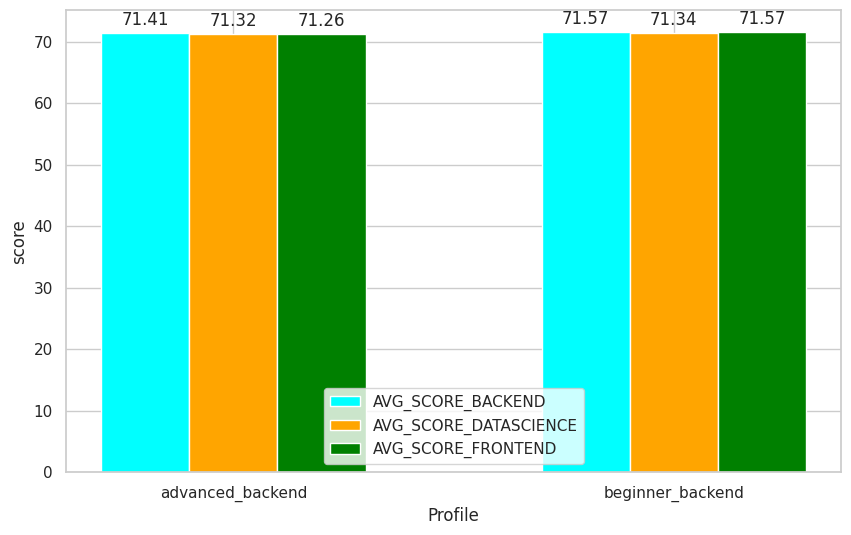

In [ ]:
x = np.arange(len(aa))  # Menggunakan panjang DataFrame untuk x
y1 = aa['AVG_SCORE_BACKEND'].tolist()
y2 = aa['AVG_SCORE_DATASCIENCE'].tolist()
y3 = aa['AVG_SCORE_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='AVG_SCORE_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='AVG_SCORE_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='AVG_SCORE_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("score")
ax.legend()

# Menampilkan chart
plt.show()

Grafik batang di bagian ini membandingkan rata-rata nilai yang diperoleh oleh setiap profil siswa dalam kursus yang backend. Data yang ditampilkan adalah rata-rata nilai untuk kursus Backend:

- Advanced Back-End: Nilai rata-rata berkisar di sekitar 71.26-71.41.
- Beginner Back-End: Nilai rata-rata berkisar di sekitar 71.34-71.57.

Perbandingan ini mengindikasikan bahwa siswa pada profil beginner backend cenderung mendapatkan nilai yang lebih tinggi dibandingkan dengan profil Advanced Back-End

## *5.6 Focus on Frontend*

### *5.6.1 Perbandingan Rata Waktu Belajar Dari Advance dan Beginner*

In [ ]:
ahh = pd.pivot_table(AFBF,index='PROFILE',values=['HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND'],aggfunc='mean')
ahh

HOURS_BACKEND  HOURS_DATASCIENCE  HOURS_FRONTEND
PROFILE                                                             
advanced_front_end      50.243357          30.838302       50.000972
beginner_front_end      30.427753          48.536601       30.282304

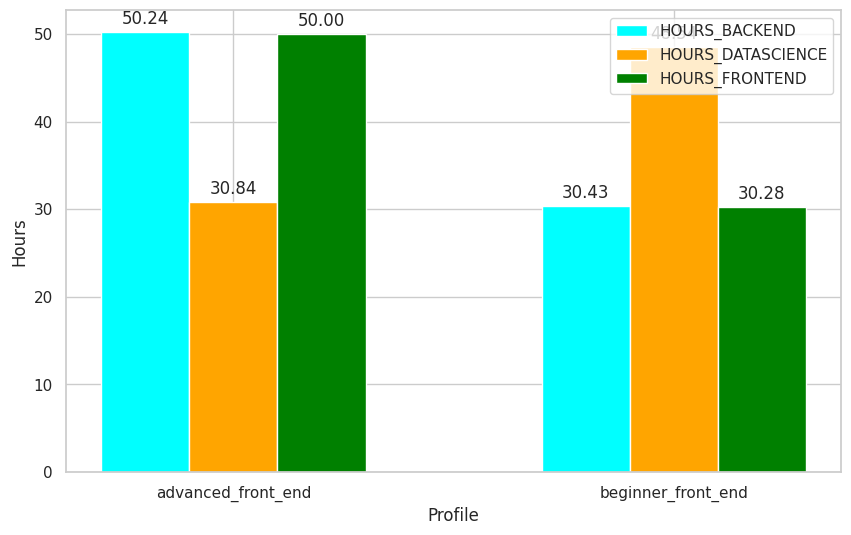

In [ ]:
x = np.arange(len(ahh))  # Menggunakan panjang DataFrame untuk x
y1 = ahh['HOURS_BACKEND'].tolist()
y2 = ahh['HOURS_DATASCIENCE'].tolist()
y3 = ahh['HOURS_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='HOURS_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='HOURS_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='HOURS_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("Hours")
ax.legend()

# Menampilkan chart
plt.show()

### *5.6.2 Perbandingan Rata Jumlah Kursus Dari Advance dan Beginner*

In [ ]:
an = pd.pivot_table(AFBF,index='PROFILE',values=['NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND'],aggfunc='mean')
an

NUM_COURSES_ADVANCED_BACKEND  \
PROFILE                                            
advanced_front_end                      5.011017   
beginner_front_end                      4.940802   

                    NUM_COURSES_ADVANCED_DATASCIENCE  \
PROFILE                                                
advanced_front_end                          3.128645   
beginner_front_end                          3.050605   

                    NUM_COURSES_ADVANCED_FRONTEND  \
PROFILE                                             
advanced_front_end                       3.013934   
beginner_front_end                       3.078612   

                    NUM_COURSES_BEGINNER_BACKEND  \
PROFILE                                            
advanced_front_end                      4.970512   
beginner_front_end                      4.937619   

                    NUM_COURSES_BEGINNER_DATASCIENCE  \
PROFILE                                                
advanced_front_end                          2.969216   
beginner_front_end                          3.049332   

                    NUM_COURSES_BEGINNER_FRONTEND  
PROFILE                                            
advanced_front_end                       3.069021  
beginner_front_end                       3.030554

In [ ]:
profil = an.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_BACKEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_ADVANCED_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_FRONTEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_FRONTEND',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_BACKEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_BACKEND',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_BEGINNER_DATASCIENCE',
    marker_color='brown'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_FRONTEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_FRONTEND',
    marker_color='green'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### *5.6.3 Perbandingan Nilai Dari Advance dan Beginner*

In [ ]:
aa = pd.pivot_table(AFBF,index='PROFILE',values=['AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],aggfunc='mean')
aa

AVG_SCORE_BACKEND  AVG_SCORE_DATASCIENCE  \
PROFILE                                                        
advanced_front_end          71.045366              59.480233   
beginner_front_end          59.520051              71.893380   

                    AVG_SCORE_FRONTEND  
PROFILE                                 
advanced_front_end           59.411860  
beginner_front_end           58.846913

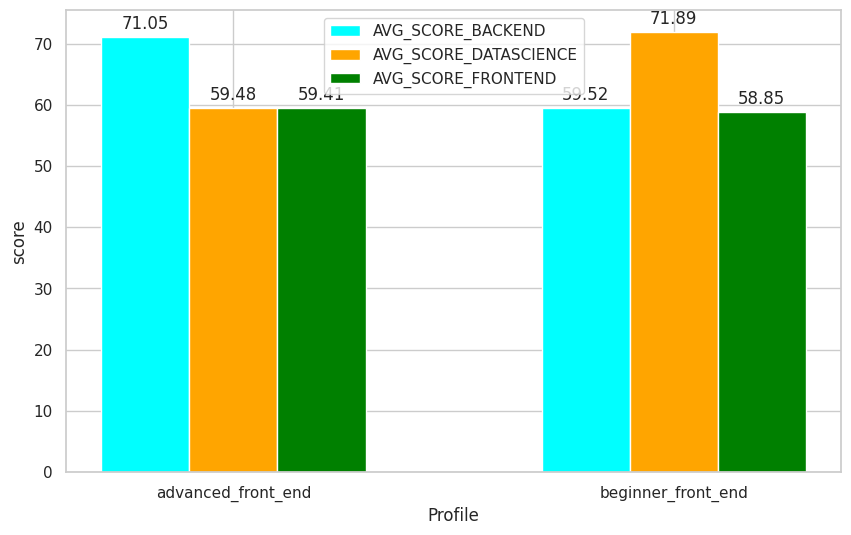

In [ ]:
x = np.arange(len(aa))  # Menggunakan panjang DataFrame untuk x
y1 = aa['AVG_SCORE_BACKEND'].tolist()
y2 = aa['AVG_SCORE_DATASCIENCE'].tolist()
y3 = aa['AVG_SCORE_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='AVG_SCORE_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='AVG_SCORE_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='AVG_SCORE_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("score")
ax.legend()

# Menampilkan chart
plt.show()

Grafik batang di bagian ini membandingkan rata-rata nilai yang diperoleh oleh setiap profil siswa dalam kursus yang Frontend. Data yang ditampilkan adalah rata-rata nilai untuk kursus  Frontend:

- Advanced Front-End: Nilai rata-rata berkisar di sekitar 59.48-71.05.
- Beginner Front-End: Nilai rata-rata berkisar di sekitar 58.85-71.89.

Perbandingan ini mengindikasikan bahwa siswa pada profil beginner cenderung mendapatkan nilai yang lebih tinggi dibandingkan dengan profil advance

## *5.7 Focus on Data Science*

### *5.7.1 Perbandingan Rata Waktu Belajar Dari Advance dan Beginner*

In [ ]:
ahh = pd.pivot_table(ADBD,index='PROFILE',values=['HOURS_DATASCIENCE', 'HOURS_BACKEND',
       'HOURS_FRONTEND'],aggfunc='mean')
ahh

HOURS_BACKEND  HOURS_DATASCIENCE  HOURS_FRONTEND
PROFILE                                                                
advanced_data_science      49.515776          49.483286       30.541393
beginner_data_science      30.166822          30.324651       49.276279

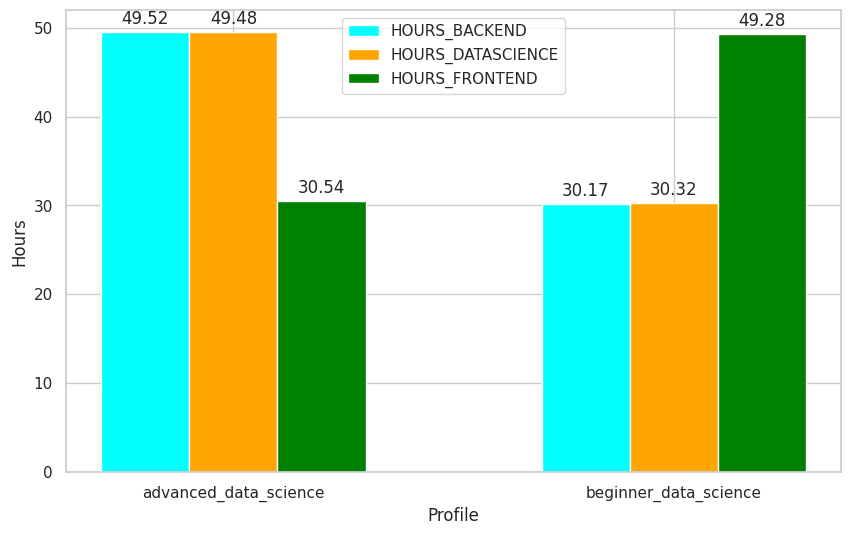

In [ ]:
x = np.arange(len(ahh))  # Menggunakan panjang DataFrame untuk x
y1 = ahh['HOURS_BACKEND'].tolist()
y2 = ahh['HOURS_DATASCIENCE'].tolist()
y3 = ahh['HOURS_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='HOURS_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='HOURS_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='HOURS_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("Hours")
ax.legend()

# Menampilkan chart
plt.show()

### *5.7.2 Perbandingan Rata Jumlah Kursus Dari Advance dan Beginner*

In [ ]:
an = pd.pivot_table(ADBD,index='PROFILE',values=['NUM_COURSES_BEGINNER_DATASCIENCE',
       'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
       'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND',
       'NUM_COURSES_ADVANCED_FRONTEND'],aggfunc='mean')
an

NUM_COURSES_ADVANCED_BACKEND  \
PROFILE                                               
advanced_data_science                      4.915027   
beginner_data_science                      3.032248   

                       NUM_COURSES_ADVANCED_DATASCIENCE  \
PROFILE                                                   
advanced_data_science                          3.000937   
beginner_data_science                          3.063256   

                       NUM_COURSES_ADVANCED_FRONTEND  \
PROFILE                                                
advanced_data_science                       2.962824   
beginner_data_science                       3.041550   

                       NUM_COURSES_BEGINNER_BACKEND  \
PROFILE                                               
advanced_data_science                      3.021556   
beginner_data_science                      3.042481   

                       NUM_COURSES_BEGINNER_DATASCIENCE  \
PROFILE                                                   
advanced_data_science                          5.007810   
beginner_data_science                          3.018605   

                       NUM_COURSES_BEGINNER_FRONTEND  
PROFILE                                               
advanced_data_science                       5.020619  
beginner_data_science                       5.030078

In [ ]:
profil = an.index.tolist()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_BACKEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_BACKEND',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_ADVANCED_DATASCIENCE',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_ADVANCED_FRONTEND'].values.tolist(),
    name='NUM_COURSES_ADVANCED_FRONTEND',
    marker_color='yellow'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_BACKEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_BACKEND',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_DATASCIENCE'].values.tolist(),
    name='NUM_COURSES_BEGINNER_DATASCIENCE',
    marker_color='brown'
))
fig.add_trace(go.Bar(
    x=profil,
    y=an['NUM_COURSES_BEGINNER_FRONTEND'].values.tolist(),
    name='NUM_COURSES_BEGINNER_FRONTEND',
    marker_color='green'
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### *5.7.3 Perbandingan Nilai Dari Advance dan Beginner*

In [ ]:
aa = pd.pivot_table(ADBD,index='PROFILE',values=['AVG_SCORE_DATASCIENCE',
       'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'],aggfunc='mean')
aa

AVG_SCORE_BACKEND  AVG_SCORE_DATASCIENCE  \
PROFILE                                                           
advanced_data_science          59.264917              58.743830   
beginner_data_science          71.701395              59.109457   

                       AVG_SCORE_FRONTEND  
PROFILE                                    
advanced_data_science           71.695095  
beginner_data_science           71.905426

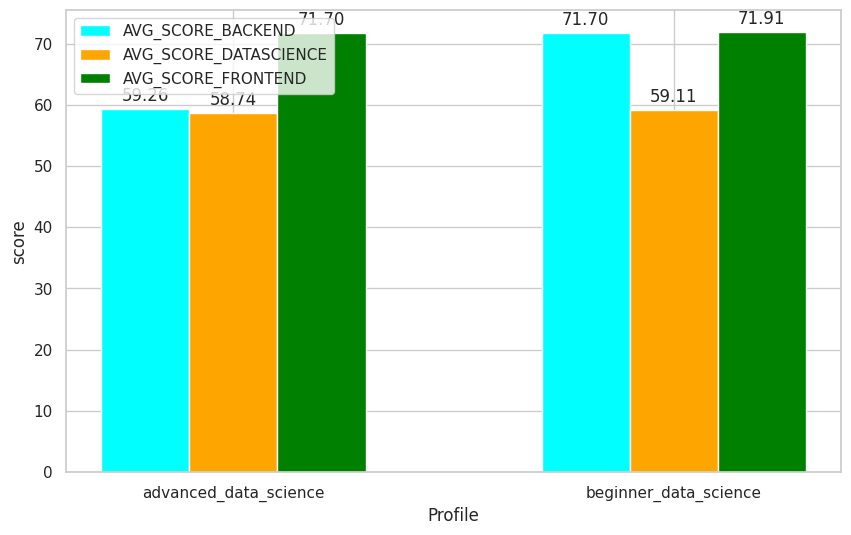

In [ ]:
x = np.arange(len(aa))  # Menggunakan panjang DataFrame untuk x
y1 = aa['AVG_SCORE_BACKEND'].tolist()
y2 = aa['AVG_SCORE_DATASCIENCE'].tolist()
y3 = aa['AVG_SCORE_FRONTEND'].tolist()
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot data dalam bentuk bar
bars1 = ax.bar(x - width, y1, width, color='cyan', label='AVG_SCORE_BACKEND')
bars2 = ax.bar(x, y2, width, color='orange', label='AVG_SCORE_DATASCIENCE')
bars3 = ax.bar(x + width, y3, width, color='green', label='AVG_SCORE_FRONTEND')

# Menambahkan label nilai pada setiap bar
ax.bar_label(bars1, labels=[f'{v:.2f}' for v in y1], padding=3)
ax.bar_label(bars2, labels=[f'{v:.2f}' for v in y2], padding=3)
ax.bar_label(bars3, labels=[f'{v:.2f}' for v in y3], padding=3)

# Menyesuaikan label dan legend
ax.set_xticks(x)
ax.set_xticklabels(ahh.index.tolist())
ax.set_xlabel("Profile")
ax.set_ylabel("score")
ax.legend()

# Menampilkan chart
plt.show()

Grafik batang di bagian ini membandingkan rata-rata nilai yang diperoleh oleh setiap profil siswa dalam kursus yang Data Science. Data yang ditampilkan adalah rata-rata nilai untuk kursus  Data Science:

- Advanced Data Science: Nilai rata-rata berkisar di sekitar 58.74-59.26.
- Beginner Data Science: Nilai rata-rata berkisar di sekitar 59.11-71.91.

Perbandingan ini mengindikasikan bahwa siswa pada profil beginner cenderung mendapatkan nilai yang lebih tinggi dibandingkan dengan profil advance

# **6. Feature Scaling Data**

In [ ]:
pendidikan_cleaned.sample(3)

NAME   USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  \
15167  Jeffrey Mcneely  55359982               46.0           25.0   
18449   Carrie Peoples  86484316                6.0           14.0   
14720      Kim Hensley  57409164               57.0           48.0   

       HOURS_FRONTEND  NUM_COURSES_BEGINNER_DATASCIENCE  \
15167            18.0                               1.0   
18449            20.0                               0.0   
14720             0.0                               3.0   

       NUM_COURSES_BEGINNER_BACKEND  NUM_COURSES_BEGINNER_FRONTEND  \
15167                           1.0                            3.0   
18449                           3.0                            5.0   
14720                           6.0                            4.0   

       NUM_COURSES_ADVANCED_DATASCIENCE  NUM_COURSES_ADVANCED_BACKEND  \
15167                               2.0                           4.0   
18449                               3.0                           4.0   
14720                               3.0                           2.0   

       NUM_COURSES_ADVANCED_FRONTEND  AVG_SCORE_DATASCIENCE  \
15167                            1.0                   73.0   
18449                            5.0                   84.0   
14720                            2.0                   73.0   

       AVG_SCORE_BACKEND  AVG_SCORE_FRONTEND             PROFILE  
15167               43.0                44.0  beginner_front_end  
18449               70.0                61.0    beginner_backend  
14720               67.0                55.0  beginner_front_end

In [ ]:
# Select features for scaling
features_to_scale = [
    'HOURS_DATASCIENCE', 'HOURS_BACKEND', 'HOURS_FRONTEND',
    'NUM_COURSES_BEGINNER_DATASCIENCE', 'NUM_COURSES_BEGINNER_BACKEND', 'NUM_COURSES_BEGINNER_FRONTEND',
    'NUM_COURSES_ADVANCED_DATASCIENCE', 'NUM_COURSES_ADVANCED_BACKEND', 'NUM_COURSES_ADVANCED_FRONTEND',
    'AVG_SCORE_DATASCIENCE', 'AVG_SCORE_BACKEND', 'AVG_SCORE_FRONTEND'
]

# Initialize scaler
scaler = MinMaxScaler()

In [ ]:
# Fit and transform the data
pendidikan_minmax = pendidikan_cleaned.copy()
pendidikan_minmax[features_to_scale] = scaler.fit_transform(pendidikan_minmax[features_to_scale])

In [ ]:
pendidikan_cleaned.head()

NAME   USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  \
0  Concepcion Vorhies   5144540               37.0           57.0   
1           John Bell  78525239               16.0           60.0   
3       Joyce Griffin  32166875               15.0           54.0   
4      Delores Morgan  69945656               17.0           39.0   
5      William Harlow  92892886               29.0           79.0   

   HOURS_FRONTEND  NUM_COURSES_BEGINNER_DATASCIENCE  \
0            28.0                               5.0   
1            54.0                               4.0   
3            36.0                               5.0   
4            14.0                               5.0   
5            39.0                               5.0   

   NUM_COURSES_BEGINNER_BACKEND  NUM_COURSES_BEGINNER_FRONTEND  \
0                           3.0                            5.0   
1                           2.0                            4.0   
3                           3.0                            7.0   
4                           3.0                            5.0   
5                           4.0                            6.0   

   NUM_COURSES_ADVANCED_DATASCIENCE  NUM_COURSES_ADVANCED_BACKEND  \
0                               4.0                           1.0   
1                               7.0                           6.0   
3                               5.0                           5.0   
4                               6.0                           4.0   
5                               5.0                           1.0   

   NUM_COURSES_ADVANCED_FRONTEND  AVG_SCORE_DATASCIENCE  AVG_SCORE_BACKEND  \
0                            4.0                   80.0               70.0   
1                            7.0                   60.0               70.0   
3                            4.0                   63.0               75.0   
4                            5.0                   68.0               80.0   
5                            3.0                   67.0               60.0   

   AVG_SCORE_FRONTEND           PROFILE  
0                70.0  advanced_backend  
1                79.0  advanced_backend  
3                62.0  advanced_backend  
4                61.0  advanced_backend  
5                67.0  advanced_backend

In [ ]:
pendidikan_minmax.tail()

NAME   USER_ID  HOURS_DATASCIENCE  HOURS_BACKEND  \
19995        Derek Wise  97610493           0.000000       0.333333   
19996        Mia Spears  99453367           0.792079       0.761905   
19997     Richard Gomez   1564658           0.237624       0.314286   
19998     Clare Andrews    799911           0.376238       0.419048   
19999  Wesley Zimmerman  49475364           0.297030       0.504762   

       HOURS_FRONTEND  NUM_COURSES_BEGINNER_DATASCIENCE  \
19995        0.276596                          0.444444   
19996        0.510638                          0.333333   
19997        0.563830                          0.444444   
19998        0.521277                          0.333333   
19999        0.148936                          0.000000   

       NUM_COURSES_BEGINNER_BACKEND  NUM_COURSES_BEGINNER_FRONTEND  \
19995                      0.666667                       0.000000   
19996                      0.000000                       0.333333   
19997                      0.666667                       0.166667   
19998                      0.222222                       0.250000   
19999                      0.000000                       0.333333   

       NUM_COURSES_ADVANCED_DATASCIENCE  NUM_COURSES_ADVANCED_BACKEND  \
19995                          0.000000                           0.3   
19996                          0.555556                           0.6   
19997                          0.111111                           0.9   
19998                          0.333333                           0.5   
19999                          0.222222                           0.5   

       NUM_COURSES_ADVANCED_FRONTEND  AVG_SCORE_DATASCIENCE  \
19995                       0.555556               0.760563   
19996                       0.222222               0.408451   
19997                       0.222222               0.464789   
19998                       0.111111               0.676056   
19999                       0.333333               0.549296   

       AVG_SCORE_BACKEND  AVG_SCORE_FRONTEND           PROFILE  
19995           0.528571            0.600000  beginner_backend  
19996           0.828571            0.785714  beginner_backend  
19997           0.457143            0.714286  beginner_backend  
19998           0.557143            0.485714  beginner_backend  
19999           0.500000            0.542857  beginner_backend

# **7. Predictive Modeling**

## *7.1 Splitting Data*

In [ ]:
train_pend, test_pend = train_test_split(pendidikan_minmax, test_size=0.2, random_state=42, stratify=pendidikan_minmax['PROFILE'])

In [ ]:
# Verifikasi pembagian data
print(f'Train set: {train_pend.shape}')
print(f'Test set: {test_pend.shape}')

Train set: (15228, 15)
Test set: (3807, 15)


In [ ]:
X = pendidikan_minmax.drop(columns=['PROFILE', 'USER_ID', 'NAME'])
y = pendidikan_minmax['PROFILE']

# Encode label strings into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train shape: (15228, 12)
X_test shape: (3807, 12)
y_train shape: (15228,)
y_test shape: (3807,)
y_train_encoded shape: (15228,)
y_test_encoded shape: (3807,)


## *7.2 Modeling*

Pada cased ini, digunakan 3 model utama yaitu  QDA (Quadratic Discriminant Analysis), XGBoost, dan KNN (K-Nearest Neighbors). Model tersebut didapatkan setelah melalui berbagai percobaan dan evaluasi terhadap model-model lain seperti Random Forest (RF), Decision Tree (DT), Logistic Regression (LR), Support Vector Machine (SVM), LightGBM, dan lain sebagainya. Keputusan untuk menggunakan ketiga model ini didasarkan pada kinerja yang superior dalam menyelesaikan masalah yang dihadapi dibandingkan dengan model lainnya. Berikut penjelasan mengenai masing-masing model dan perbedaannya:

1. **QDA (Quadratic Discriminant Analysis)**
   - *`Penjelasan:`*
     QDA adalah model klasifikasi yang mengasumsikan bahwa setiap kelas memiliki distribusi Gaussian (normal) yang berbeda, dengan matriks kovarians yang berbeda pula. QDA adalah variasi dari Linear Discriminant Analysis (LDA) tetapi tidak mengasumsikan bahwa matriks kovarians dari setiap kelas adalah sama, yag artinya QDA berharap adanya kovarians yang berbeda antar kelas.
   
   - *`Waktu Yang Tepat Menggunakan QDA:`*
     - Cocok untuk data yang memiliki distribusi Gaussian dan kelas-kelas yang berbeda secara signifikan dalam hal varians dan korelasi antara fitur-fitur.
     - Efektif saat data berstruktur non-linear, karena QDA memungkinkan perbedaan yang lebih kompleks antara kelas-kelas.

   - *`Jenis Data yang Cocok:`*
     - Data dengan varians antar kelas yang berbeda.
     - Data dengan distribusi yang mendekati normal (Gaussian).

2. **XGBoost (Extreme Gradient Boosting)**
   - *`Penjelasan:`*
     XGBoost adalah salah satu algoritma boosting yang paling kuat dan populer. Algoritma ini membangun model yang kuat dengan menggabungkan banyak model prediksi lemah (seperti pohon keputusan) secara berurutan, di mana setiap model berikutnya mencoba memperbaiki kesalahan model sebelumnya.
   
   - *`Waktu Yang Tepat Menggunakan XGBoost:*
     - Cocok untuk berbagai jenis data, baik data tabular dengan banyak fitur maupun data dengan hubungan yang kompleks antar fitur.
     - Sangat efektif dalam menangani outlier, missing values, dan data dengan skala fitur yang berbeda.
     - Digunakan saat kinerja model adalah prioritas, karena XGBoost sering menghasilkan hasil yang sangat baik dalam berbagai kompetisi machine learning.

   - *`Jenis Data yang Cocok:`*
     - Data dengan struktur yang kompleks, banyak fitur, dan interaksi yang tidak linier.
     - Data dengan ketidakseimbangan kelas (XGBoost memiliki metode untuk menangani ini).

3. **KNN (K-Nearest Neighbors)**
   - *`Penjelasan:`*
     KNN adalah model klasifikasi yang bekerja dengan mencari sejumlah K tetangga terdekat dari titik data yang tidak dikenal dan kemudian menentukan kelas mayoritas di antara tetangga tersebut. KNN sangat sederhana namun efektif dalam beberapa kasus.
   
   - *`Waktu Yang Tepat Menggunakan KNN:`*
     - Cocok untuk data dengan distribusi kelas yang jelas dan tidak terlalu banyak fitur (karena KNN bisa menjadi lambat saat jumlah fitur dan data meningkat).
     - Ideal untuk masalah klasifikasi dengan batasan keputusan yang sederhana dan non-linear.

   - *`Jenis Data yang Cocok:`*
     - Data dengan jumlah fitur yang moderat dan distribusi kelas yang jelas.
     - Data yang tidak terlalu besar karena KNN memiliki kompleksitas komputasi yang tinggi.

### **Perbedaan Utama Antara QDA, XGBoost, dan KNN**
   - **QDA**: Model probabilistik dengan asumsi distribusi Gaussian dan kovarians berbeda antar kelas. Cocok untuk data dengan struktur distribusi yang berbeda antar kelas.
   - **XGBoost**: Model ensemble yang kuat dan fleksibel, cocok untuk data kompleks dan memiliki performa tinggi dalam berbagai kasus.
   - **KNN**: Model non-parametrik yang sederhana, cocok untuk data dengan batasan keputusan yang jelas dan ukuran data yang relatif kecil.

### *7.2.1 Quadratic Discriminant Analysis*

In [ ]:
# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
# Memprediksi dengan model QDA
y_pred_qda = qda.predict(X_test)

In [ ]:
# Quadratic Discriminant Analysis
qda_params = qda.get_params()
print("Quadratic Discriminant Analysis Parameters:")
qda_params

Quadratic Discriminant Analysis Parameters:


{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

### *7.2.2 Extreme Gradient Boosting (XGBoost)*

In [ ]:
# Extreme Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[22:29:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Memprediksi dengan model XGB
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Extreme Gradient Boosting (XGBoost)
xgb_params = xgb_model.get_params()
print("\nExtreme Gradient Boosting (XGBoost) Parameters:")
xgb_params


Extreme Gradient Boosting (XGBoost) Parameters:


{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'mlogloss',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

### *7.2.3 K-Nearest Neighbors (KNN)*

In [ ]:
# Membuat model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier()

In [ ]:
# Memprediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

In [ ]:
# K-Nearest Neighbors (KNN)
knn_params = knn.get_params()
print("\nK-Nearest Neighbors (KNN) Parameters:")
knn_params


K-Nearest Neighbors (KNN) Parameters:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# **8. Model Evaluation**

### *8.1 Quadratic Discriminant Analysis*

In [ ]:
# Evaluasi model
acc_QDA = accuracy_score(y_test, y_pred_qda)

print("QDA Accuracy:", acc_QDA)
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))

QDA Accuracy: 0.9771473601260835
QDA Classification Report:
                        precision    recall  f1-score   support

     advanced_backend       0.99      0.97      0.98       626
advanced_data_science       0.96      0.98      0.97       640
   advanced_front_end       0.97      0.98      0.97       617
     beginner_backend       0.98      0.97      0.97       651
beginner_data_science       0.98      0.97      0.98       645
   beginner_front_end       0.99      0.99      0.99       628

             accuracy                           0.98      3807
            macro avg       0.98      0.98      0.98      3807
         weighted avg       0.98      0.98      0.98      3807



In [ ]:
# Menghitung metrik evaluasi
precision_QDA = precision_score(y_test, y_pred_qda, average='weighted')  # Menggunakan average='weighted'
recall_QDA = recall_score(y_test, y_pred_qda, average='weighted')  # Menggunakan average='weighted'
f1_QDA = f1_score(y_test, y_pred_qda, average='weighted')  # Menggunakan average='weighted'
conf_matrix_QDA = confusion_matrix(y_test, y_pred_qda)

# Menghitung probabilitas prediksi
y_proba_qda = qda.predict_proba(X_test)
# Menghitung AUC
auc_QDA = roc_auc_score(y_test, y_proba_qda, multi_class='ovr', average='weighted')

# Mencetak hasil evaluasi
print("Evaluasi Model QDA:")
print("------------------")
print(f"Precision         : {precision_QDA:.5f}")
print(f"Recall            : {recall_QDA:.5f}")
print(f"F1-Score          : {f1_QDA:.5f}")
print(f"ROC-AUC Score     : {auc_QDA:.5f}")

Evaluasi Model QDA:
------------------
Precision         : 0.97729
Recall            : 0.97715
F1-Score          : 0.97717
ROC-AUC Score     : 0.99572


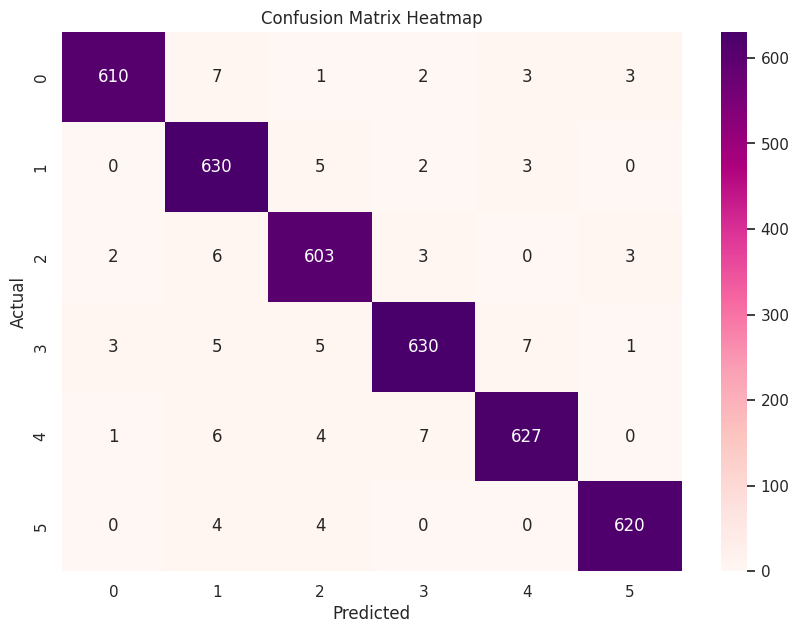

In [ ]:
# Membuat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_QDA, annot=True, fmt="d", cmap="RdPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### *8.2 Extreme Gradient Boosting (XGBoost)*

In [ ]:
# Decode the predictions back to original labels
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

acc_XGB = accuracy_score(y_test_decoded, y_pred_xgb_decoded)


# Evaluasi model
print("XGBoost Accuracy:", acc_XGB)
print("XGBoost Classification Report:\n", classification_report(y_test_decoded, y_pred_xgb_decoded))

XGBoost Accuracy: 0.9322301024428684
XGBoost Classification Report:
                        precision    recall  f1-score   support

     advanced_backend       0.95      0.94      0.95       626
advanced_data_science       0.91      0.93      0.92       640
   advanced_front_end       0.92      0.94      0.93       617
     beginner_backend       0.94      0.90      0.92       651
beginner_data_science       0.93      0.93      0.93       645
   beginner_front_end       0.95      0.95      0.95       628

             accuracy                           0.93      3807
            macro avg       0.93      0.93      0.93      3807
         weighted avg       0.93      0.93      0.93      3807



In [ ]:
# Menghitung metrik evaluasi
precision_XGB = precision_score(y_test_decoded, y_pred_xgb_decoded, average='weighted')  # Menggunakan average='weighted'
recall_XGB = recall_score(y_test_decoded, y_pred_xgb_decoded, average='weighted')  # Menggunakan average='weighted'
f1_XGB = f1_score(y_test_decoded, y_pred_xgb_decoded, average='weighted')  # Menggunakan average='weighted'
conf_matrix_XGB = confusion_matrix(y_test_decoded, y_pred_xgb_decoded)

# Menghitung probabilitas prediksi
y_proba_XGB = xgb_model.predict_proba(X_test)
# Menghitung AUC
auc_XGB = roc_auc_score(y_test_decoded, y_proba_XGB, multi_class='ovr', average='weighted')

# Mencetak hasil evaluasi
print("Evaluasi Model:")
print("------------------")
print(f"Precision         : {precision_XGB:.5f}")
print(f"Recall            : {recall_XGB:.5f}")
print(f"F1-Score          : {f1_XGB:.5f}")
print(f"ROC-AUC Score     : {auc_XGB:.5f}")

Evaluasi Model:
------------------
Precision         : 0.93244
Recall            : 0.93223
F1-Score          : 0.93219
ROC-AUC Score     : 0.99257


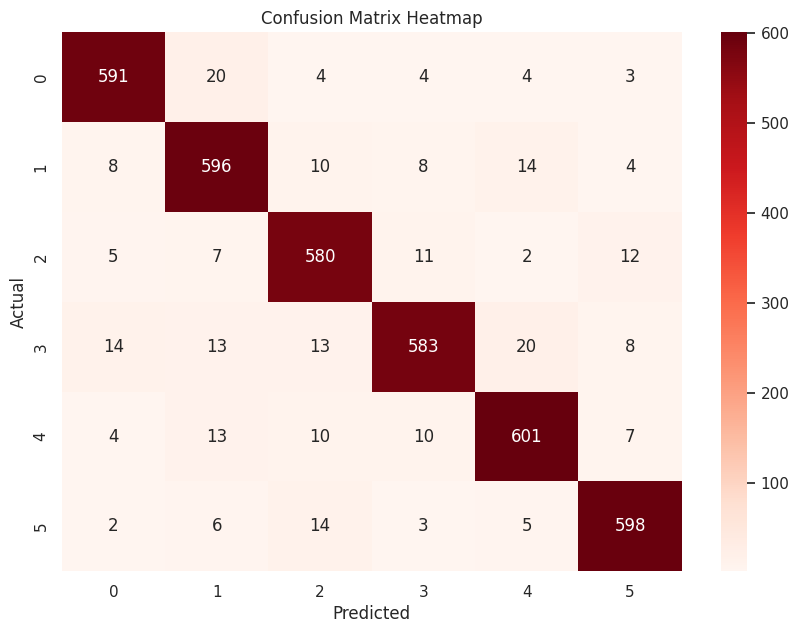

In [ ]:
# Membuat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_XGB, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### *8.3 K-Nearest Neighbors (KNN)*

In [ ]:
# Evaluasi model

acc_KNN = accuracy_score(y_test_encoded, y_pred_knn)

print("K-Nearest Neighbors (KNN) Accuracy:", acc_KNN)
print("K-Nearest Neighbors (KNN) Classification Report:\n", classification_report(y_test_encoded, y_pred_knn, target_names=label_encoder.classes_))

K-Nearest Neighbors (KNN) Accuracy: 0.9332807985290255
K-Nearest Neighbors (KNN) Classification Report:
                        precision    recall  f1-score   support

     advanced_backend       0.94      0.93      0.94       626
advanced_data_science       0.90      0.95      0.92       640
   advanced_front_end       0.91      0.96      0.94       617
     beginner_backend       0.95      0.90      0.92       651
beginner_data_science       0.95      0.92      0.93       645
   beginner_front_end       0.96      0.94      0.95       628

             accuracy                           0.93      3807
            macro avg       0.93      0.93      0.93      3807
         weighted avg       0.93      0.93      0.93      3807



In [ ]:
# Menghitung metrik evaluasi
precision_KNN = precision_score(y_test_encoded, y_pred_knn, average='weighted')  # Menggunakan average='weighted'
recall_KNN = recall_score(y_test_encoded, y_pred_knn, average='weighted')  # Menggunakan average='weighted'
f1_KNN = f1_score(y_test_encoded, y_pred_knn, average='weighted')  # Menggunakan average='weighted'
conf_matrix_KNN = confusion_matrix(y_test_encoded, y_pred_knn)

# Menghitung probabilitas prediksi
y_proba_KNN = knn.predict_proba(X_test)
# Menghitung AUC
auc_KNN = roc_auc_score(y_test_encoded, y_proba_KNN, multi_class='ovr', average='weighted')

# Mencetak hasil evaluasi
print("Evaluasi Model KNN:")
print("------------------")
print(f"Precision         : {precision_KNN:.5f}")
print(f"Recall            : {recall_KNN:.5f}")
print(f"F1-Score          : {f1_KNN:.5f}")
print(f"ROC-AUC Score     : {auc_KNN:.5f}")

Evaluasi Model KNN:
------------------
Precision         : 0.93411
Recall            : 0.93328
F1-Score          : 0.93328
ROC-AUC Score     : 0.98629


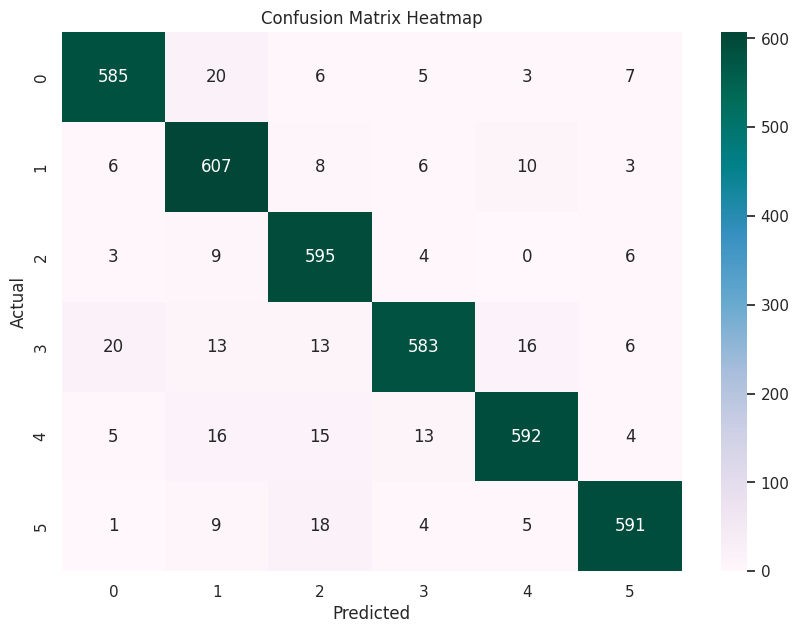

In [ ]:
# Membuat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_KNN, annot=True, fmt="d", cmap="PuBuGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

## 8.4 Model Selection and Explanation

Model Selection (Pemilihan Model) adalah proses memilih model terbaik dari beberapa kandidat berdasarkan kinerja mereka pada data tertentu. Ini adalah bagian penting dari pipeline machine learning yang memastikan model yang dipilih paling optimal untuk data dan tujuan spesifik proyek. Ada tiga metode utama yang digunakan untuk memastikan bahwa model yang dipilih adalah yang terbaik:

1. Berdasarkan `Evaluasi Model`: Melibatkan pengukuran kinerja model menggunakan metrik tertentu, seperti akurasi, precision, recall, F1-score, atau ROC-AUC. Model yang memiliki performa terbaik pada metrik ini dipilih sebagai model yang optimal.

2. Berdasarkan `Cross-Validation`: Melibatkan pembagian data menjadi beberapa subset atau "folds" dan melatih model pada beberapa iterasi pelatihan/validasi untuk memastikan model yang dipilih tidak overfitting pada data pelatihan. Model yang konsisten memiliki kinerja yang baik di seluruh folds dianggap sebagai model yang lebih andal.

Dengan menggunakan metode-metode ini, pemilihan model dalam machine learning menjadi lebih terstruktur dan memastikan model yang dipilih adalah yang paling sesuai dengan data dan tujuan analisis.

### 8.4.1 Based on Values ​​in the Evaluation Model Results

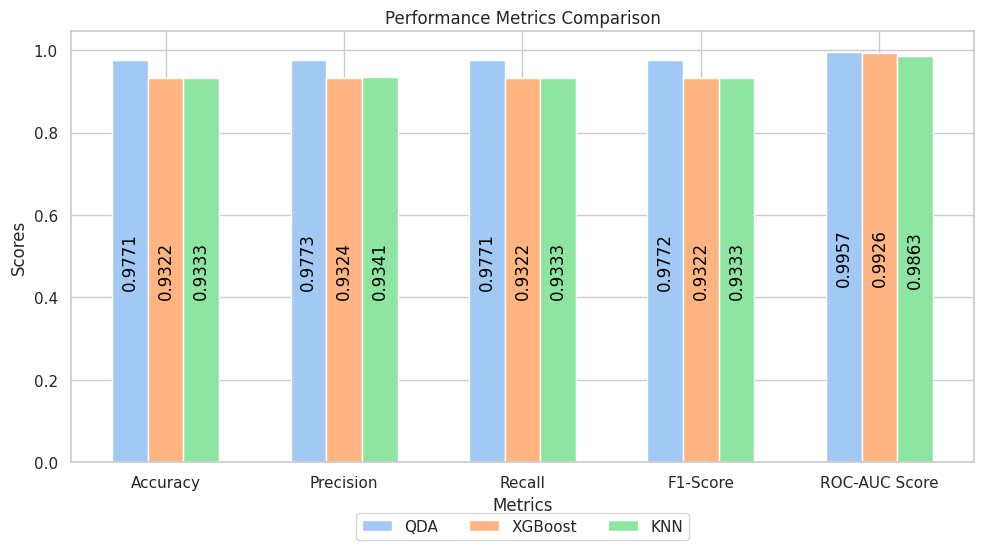

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC Score']

# Skor untuk setiap model berdasarkan hasil perhitungan sebelumnya
qda_scores = [acc_QDA, precision_QDA, recall_QDA, f1_QDA, auc_QDA]
xgb_scores = [acc_XGB, precision_XGB, recall_XGB, f1_XGB, auc_XGB]
knn_scores = [acc_KNN, precision_KNN, recall_KNN, f1_KNN, auc_KNN]

# Posisi bar untuk setiap grup
bar_width = 0.2
index = np.arange(len(metrics))

# Membuat bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, qda_scores, bar_width, label='QDA')
bar2 = ax.bar(index + bar_width, xgb_scores, bar_width, label='XGBoost')
bar3 = ax.bar(index + 2*bar_width, knn_scores, bar_width, label='KNN')

# Menambahkan label ke setiap bar
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Menampilkan nilai di dalam setiap bar dengan orientasi vertikal
for bar in bar1 + bar2 + bar3:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval / 2, f'{yval:.4f}', va='center', ha='center', rotation=90, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit legend
plt.show()

1. Accuracy

> Accuracy mengukur seberapa sering model memprediksi dengan benar. QDA memiliki nilai accuracy tertinggi dengan nilai `0.9771`, menunjukkan bahwa model ini paling sering memberikan prediksi yang benar dibandingkan XGBoost sebesar `0.9322` dan KNN sebesar `0.9333`

2. Precision

> Precision menunjukkan persentase prediksi positif yang benar-benar positif. KNN dengan nilai `0.9341` dan XGBoost sebesar `0.9324` memiliki precision yang hampir setara, dengan KNN sedikit lebih unggul. Namun tetap lebih bagus untuk QDA Sebesar `0.9773` Precision penting ketika biaya kesalahan positif palsu tinggi (misalnya, dalam kasus deteksi penipuan).

3. Recall

> Recall menunjukkan seberapa baik model menangkap semua kasus positif. QDA lagi-lagi unggul dengan score `0.9772`, menunjukkan bahwa model ini lebih baik dalam mendeteksi semua kejadian positif dibandingkan XGBoost yang bernilai `0.9322` dan KNN sebesar `0.9333`. Recall sangat penting ketika biaya kesalahan negatif palsu tinggi (misalnya, dalam diagnosis penyakit).

4. F1-Score

> F1-Score adalah rata-rata harmonis dari precision dan recall, dan memberikan keseimbangan antara keduanya. QDA unggul di sini dengan score `0.9772`, menunjukkan keseimbangan yang lebih baik antara menangkap semua kejadian positif dan meminimalkan kesalahan positif palsu. Metric ini sangat berguna ketika ada ketidakseimbangan kelas dan kita ingin mempertimbangkan baik precision maupun recall.

5. ROC-AUC Score

> ROC-AUC Score mengukur kemampuan model untuk membedakan antara kelas positif dan negatif pada berbagai threshold. QDA sekali lagi menunjukkan performa terbaik dengan nilai sebesar `0.9957`, diikuti oleh XGBoost `0.9926` dan KNN `0.9863`. ROC-AUC memberikan gambaran tentang performa model di berbagai threshold, yang sangat penting dalam aplikasi di mana kita dapat menyesuaikan threshold sesuai kebutuhan.

Kesimpulan:

1. QDA secara konsisten menunjukkan performa terbaik di semua metrik, menunjukkan bahwa ini adalah model yang paling andal untuk dataset ini. Model ini seimbang dalam hal precision dan recall, memiliki accuracy tertinggi secara keseluruhan, dan unggul dalam membedakan antara kelas-kelas seperti yang ditunjukkan oleh nilai ROC-AUC.

2. XGBoost dan KNN memiliki performa yang mirip, dengan XGBoost sedikit tertinggal di semua metrik. XGBoost mungkin lebih disukai dalam skenario di mana interpretasi model dan pentingnya fitur sangat penting, meskipun skornya lebih rendah.

3. Berdasarkan evaluasi, QDA adalah model yang paling cocok untuk tugas-tugas yang membutuhkan precision, recall, dan accuracy yang tinggi. Namun, jika efisiensi komputasi atau kasus penggunaan tertentu menunjukkan model lain, KNN dan XGBoost tetap menjadi alternatif yang kompetitif.

### 8.4.2 Based on Cross Validation with Average Score

In [ ]:
models = {
    "KNN": KNeighborsClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "XGBoost": XGBClassifier()
}

# List hasil
results = []

# Cross-validation dan simpan hasilnya dalam DataFrame
for name, model in models.items():
    scores = cross_val_score(model, X, y_encoded, cv=10, scoring='accuracy')

    # Menyimpan hasil cross-validation di setiap fold
    for i, score in enumerate(scores, start=1):
        results.append({"Model": name, "Fold": i, "Accuracy": score})

    # Menyimpan mean dan standard deviation dari hasil cross-validation
    results.append({
        "Model": name,
        "Fold": "Mean ± Std",
        "Accuracy": f"{scores.mean():.4f} ± {scores.std():.4f}"
    })

# Membuat DataFrame dari hasil cross-validation
results_df = pd.DataFrame(results)

# Pilih model terbaik berdasarkan skor rata-rata tertinggi
mean_accuracies = results_df[results_df['Fold'] == 'Mean ± Std']
best_model_name = mean_accuracies.loc[mean_accuracies['Accuracy'].str.split(' ± ').str[0].astype(float).idxmax(), 'Model']
print(f"\nBest model: {best_model_name}")


Best model: QDA


In [ ]:
# Memisahkan setiap model ke dalam DataFrame terpisah
knn_df = results_df[results_df['Model'] == 'KNN'].reset_index(drop=True)
qda_df = results_df[results_df['Model'] == 'QDA'].reset_index(drop=True)
xgboost_df = results_df[results_df['Model'] == 'XGBoost'].reset_index(drop=True)

In [ ]:
# Menggabungkan DataFrame berdasarkan kolom 'Fold'
combined_df = pd.merge(knn_df[['Fold', 'Accuracy']], qda_df[['Fold', 'Accuracy']], on='Fold', how='outer', suffixes=('_KNN', '_QDA'))
combined_df = pd.merge(combined_df, xgboost_df[['Fold', 'Accuracy']], on='Fold', how='outer')
combined_df = combined_df.rename(columns={'Accuracy': 'Accuracy_XGBoost'})

In [ ]:
combined_df

Fold     Accuracy_KNN     Accuracy_QDA Accuracy_XGBoost
0            1         0.928571         0.971639         0.934349
1            2         0.939601         0.978992         0.933298
2            3         0.922269         0.980042         0.938025
3            4         0.918067         0.972164         0.926471
4            5         0.935924         0.981618         0.944853
5            6         0.936416         0.978455         0.936416
6            7         0.924855         0.976353         0.931161
7            8         0.925906         0.973726         0.937993
8            9         0.939569         0.981083          0.93484
9           10         0.928534          0.97793          0.93011
10  Mean ± Std  0.9300 ± 0.0071  0.9772 ± 0.0034  0.9348 ± 0.0048

1. `QDA` memiliki rata-rata akurasi tertinggi `(0.9772)` dengan standar deviasi terendah `(0.0034)`, menandakan bahwa model ini tidak hanya akurat tetapi juga sangat stabil di seluruh fold. Ini adalah pilihan terbaik jika prioritasnya adalah akurasi tinggi dan konsistensi.

2. `XGBoost` juga menunjukkan performa yang baik dengan akurasi rata-rata `(0.9348)` lebih tinggi dari KNN `(0.9300)`, namun tidak sebaik QDA. Model ini cocok jika Anda mencari keseimbangan antara akurasi dan kompleksitas model.

3. `KNN` memiliki akurasi terendah dengan variabilitas tertinggi `(0.0071)`. Meskipun model ini lebih sederhana dan mungkin lebih mudah diinterpretasikan, ia kurang konsisten dan stabil dibandingkan dengan QDA dan XGBoost.

### 8.4.3 Why is the QDA Model is Perfect for this Dataset?

- Let's check asumsi untuk model QDA pada penjelasan diatas tadi.

1. Pertama adalah memastikan bahwa setiap fitur (variabel) dalam dataset Anda mengikuti distribusi normal untuk setiap kelas. Disini menggunakan uji normalitas dengan Histogram dan melihat bagaimana bentuknya pada setiap feature yang digunakan pada modeling. Jika bentuk data pada plot histogram mengarah pada normal atau berbentuk lonceng maka asumsi ini terpenuhi.

2. Kedua adalah memastikan bahwa setiap kelas memiliki matriks kovarians yang berbeda. Maka akan dilakukan penghitungan matriks kovarians untuk masing-masing kelas dan membandingkan. Jika matriks kovarians berbeda secara signifikan, asumsi ini terpenuhi.

In [ ]:
features = pendidikan_cleaned.columns.tolist()
unique_classes = pendidikan_cleaned['PROFILE'].unique()
features.remove('PROFILE')
features.remove('USER_ID')
features.remove('NAME')

#### 8.4.3.1 Feature Normality

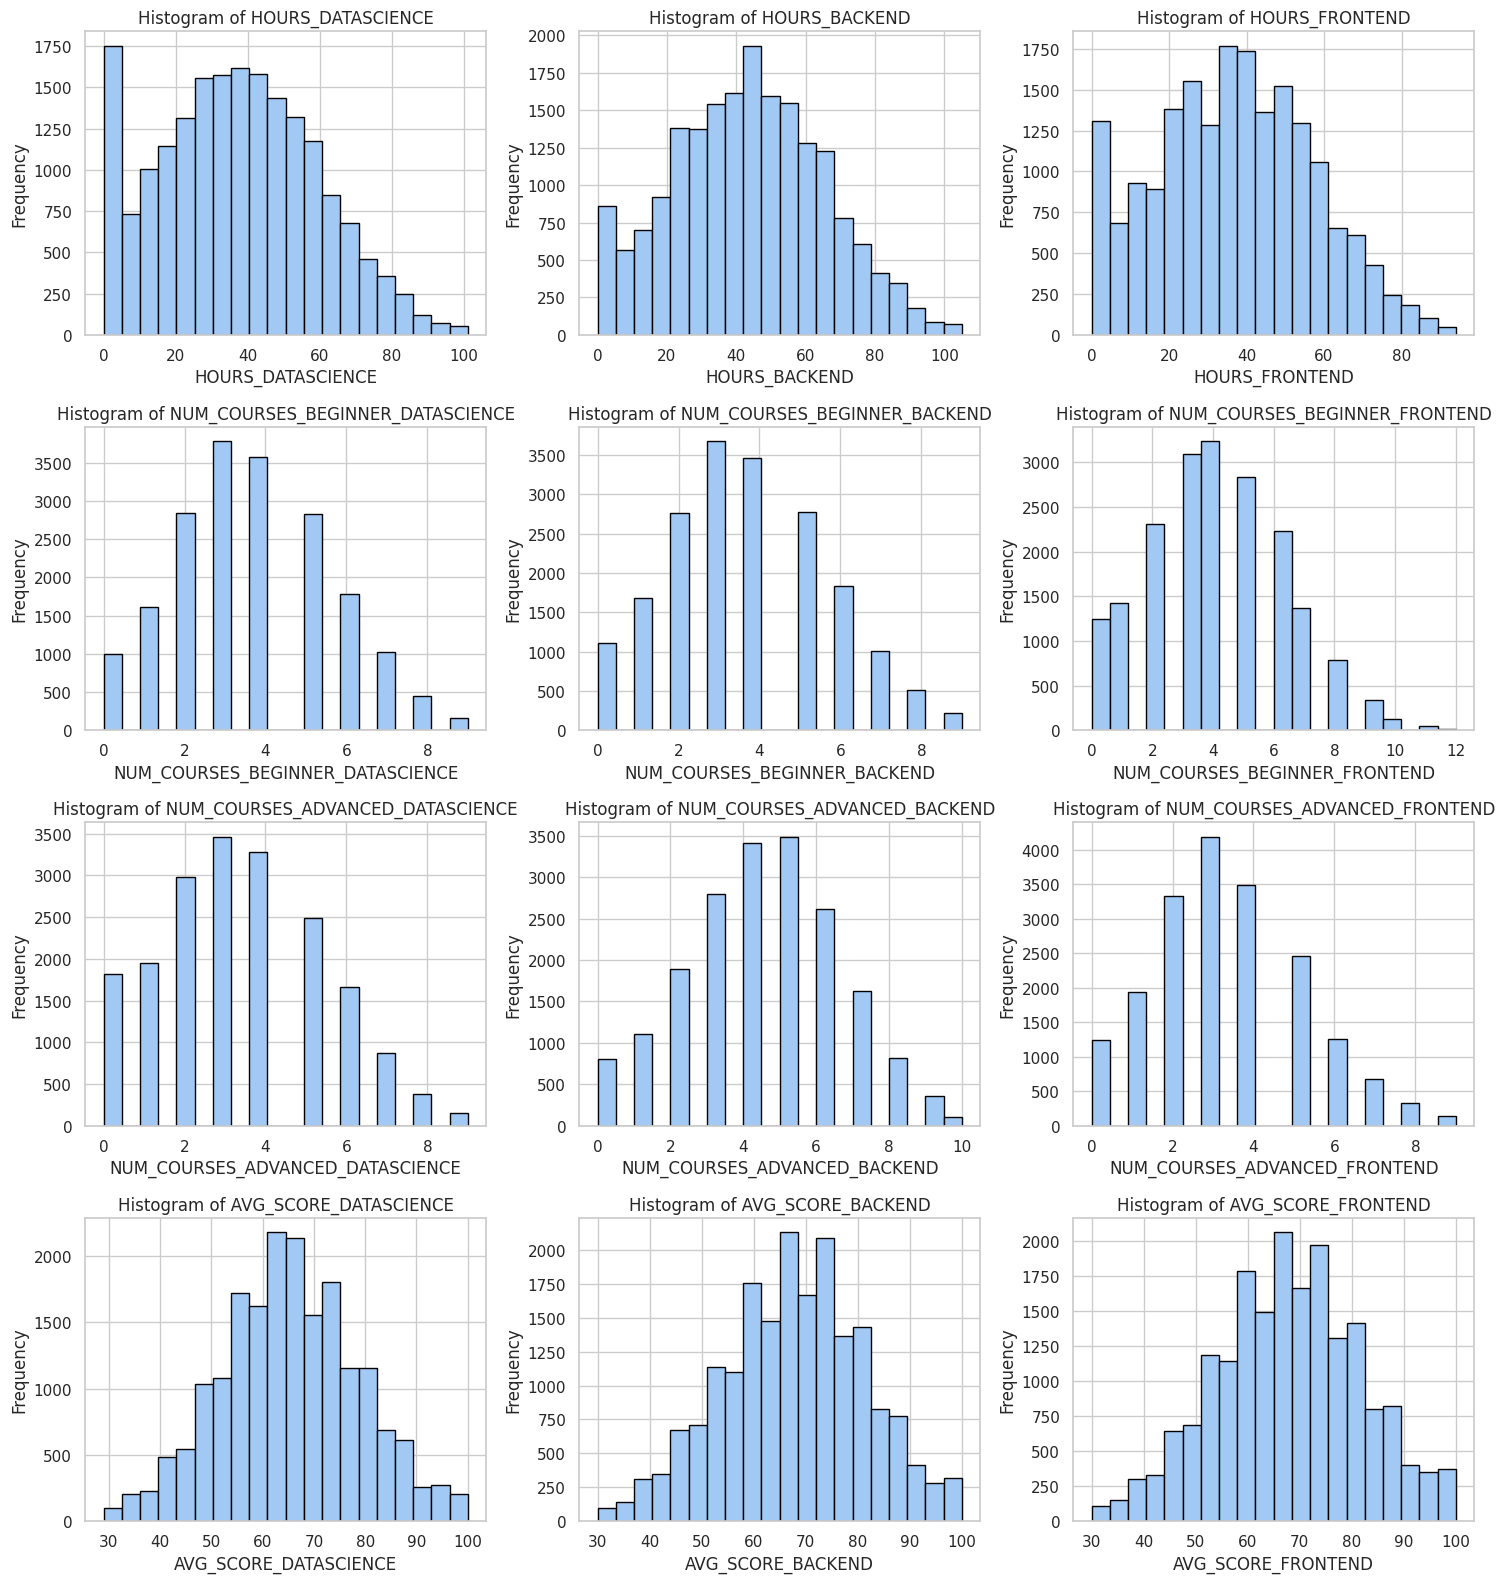

In [ ]:
# Tentukan jumlah subplot (berdasarkan jumlah fitur)
n_features = len(features)
n_cols = 3  # Tentukan berapa banyak kolom yang ingin Anda tampilkan
n_rows = int(np.ceil(n_features / n_cols))  # Hitung berapa baris yang dibutuhkan

# Buat subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axs = axs.flatten()  # Mengubah array subplots menjadi array datar untuk iterasi

for i, feature in enumerate(features):
    data = pendidikan_cleaned[feature]
    axs[i].hist(data, bins=20, edgecolor='black')
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')

# Hapus subplot kosong (jika ada)
for i in range(len(features), len(axs)):
    fig.delaxes(axs[i])

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

> Pada asumsi pertama untuk Feature Normality. Terlihat bahwa Fitur HOURS_ dan AVG_SCORE_ dalam dataset ini menunjukkan distribusi yang mendekati normal, yang memang cukup cocok dengan asumsi normalitas yang diperlukan untuk model QDA (Quadratic Discriminant Analysis). Namun memang di beberapa feature seperti fitur NUM_COURSES_ terutama pada level pemula menunjukkan beberapa penyimpangan dari normalitas (ada kemiringan atau distribusi bimodal). Namun, penyimpangan ini tidak selalu menghalangi penggunaan model QDA. Dan memang terbukti dengan baik nya model QDA bekerja. `SO ON THIS ASSUMPTION THE DATA IS SUITABLE ENOUGH FOR QDA`

#### 8.4.3.2 Separate Covariance in Each Class

In [ ]:
for class_value in unique_classes:
    # Ambil data untuk setiap kelas
    data = pendidikan_cleaned[pendidikan_cleaned['PROFILE'] == class_value][features]

    # Hitung matriks kovarians
    covariance_matrix = np.cov(data.T)

    # Hitung determinan matriks kovarians
    determinant = np.linalg.det(covariance_matrix)

    # Cetak matriks kovarians dan determinannya
    # print(f'Covariance matrix for class {class_value}:\n{covariance_matrix}\n')
    print(f'Determinant for class {class_value}: {determinant}\n')

Determinant for class advanced_backend: 116112196910806.84

Determinant for class advanced_data_science: 104141135216291.61

Determinant for class advanced_front_end: 21081722041064.703

Determinant for class beginner_data_science: 171475279077700.12

Determinant for class beginner_front_end: 75519506539239.06

Determinant for class beginner_backend: 377484654916742.6



In [ ]:
# Menggabungkan data fitur dan label (kelas) ke dalam satu dataframe
data = pendidikan_cleaned[features + ['PROFILE']]

# Melakukan Box's M test dengan library Pingouin
box_m_test = pg.box_m(data, dvs=features, group='PROFILE')

# Hasil
box_m_test

/usr/local/lib/python3.10/dist-packages/pingouin/multivariate.py:389: RuntimeWarning:

divide by zero encountered in log



Chi2     df  pval  equal_cov
box   inf  390.0   0.0      False

> Pada asumsi kedua untuk Separated Covariance in Each Class is has been met. Karena berdasarkan uji coba diatas yaitu menggunakan Determinant dari masing masing class, dan juga menggunakan metode Box's M test menunjukkan bahwa covariance antar class sangat berbeda satu sama lainnya. Bisa dilihat pada Determinant sangat berbeda, dan pada uji Box's M nilai dari kolom equal_cov sama dengan False, dan Chi2(chi-square) inf yang artinya infinity, lalu dengan nilai df(degree of freedom) dari statistik chi-square adalah 390 degree, dan p-val yang cukup kecil. `SO ON THIS ASSUMPTION, THE DATA IS PERFECTLY SUITABLE FOR QDA`

### 8.4.4 Summary of Model Selection

Dalam proses pemilihan model, tiga model dibandingkan: Quadratic Discriminant Analysis (QDA), XGBoost, dan K-Nearest Neighbors (KNN). Pemilihan ini didasarkan pada beberapa metrik, termasuk akurasi, precision, recall, F1-score, dan ROC-AUC, GridSearchCV serta hasil Cross-Validation.

Terlihat Bahwa Semua Metrik Utama dari QDA ini sangat tinggi dan lebih tinggi dari semua model lainnya. Apalagi setelah menggunakan Cross-Validation Mean Accuracy: 0.9772 dengan Standard Deviation 0.0034 yang berarti nilai error dari model tersebut sangat kecil.

QDA secara konsisten mengungguli model-model lain di semua metrik utama dan menunjukkan stabilitas serta konsistensi yang luar biasa dalam cross-validation. Oleh karena itu, QDA adalah model yang direkomendasikan untuk dataset dan tugas spesifik ini, memastikan akurasi tinggi dan keandalan dalam prediksi.

# **9. Conclusion**

## *9.1 Ringkasan Temuan*

Penelitian ini telah berhasil mengembangkan model personalisasi profil pengguna berdasarkan aktivitas pembelajaran online menggunakan tiga model utama: **Quadratic Discriminant Analysis (QDA)**, **Extreme Gradient Boosting (XGBoost)**, dan **K-Nearest Neighbors (KNN)**. Dari hasil evaluasi, model QDA terbukti menjadi yang paling efektif dengan akurasi dan konsistensi tertinggi dibandingkan dua model lainnya. QDA mampu menangkap variasi yang ada dalam data pengguna dan menghasilkan prediksi yang akurat untuk setiap profil pengguna.

Temuan utama lainnya mencakup:

- **Distribusi profil pengguna yang relatif merata** antara level *beginner* dan *advanced*, menunjukkan bahwa metode pembelajaran yang digunakan efektif untuk berbagai tingkat keahlian.
- **Perbedaan dalam waktu belajar dan jumlah kursus yang diambil** antara pengguna *beginner* dan *advanced*, di mana pengguna dengan profil *advanced* cenderung menghabiskan lebih banyak waktu dan mengikuti lebih banyak kursus.
- **Kinerja pengguna yang tidak selalu lebih tinggi pada level *advanced***, khususnya dalam bidang seperti *data science* dan *frontend*, mengindikasikan bahwa materi yang lebih kompleks dapat mengakibatkan tantangan yang lebih besar dalam mencapai nilai tinggi.

## *9.2 Implikasi dari Hasil*

Hasil penelitian ini memiliki beberapa implikasi penting bagi pengembangan platform pembelajaran online:

1. **Peningkatan Personalisasi**  
   Dengan menggunakan model QDA, platform pembelajaran dapat meningkatkan personalisasi konten yang diberikan kepada pengguna, sehingga lebih sesuai dengan kebutuhan dan kemampuan individu.

2. **Pengembangan Kurikulum yang Lebih Adaptif**  
   Temuan bahwa pengguna dengan profil *advanced* sering kali menghadapi tantangan lebih besar dalam mencapai nilai tinggi menunjukkan perlunya kurikulum yang lebih adaptif dan dukungan yang lebih kuat bagi pengguna di level ini.

3. **Optimalisasi Pengalaman Pengguna**  
   Menyediakan rekomendasi yang lebih tepat waktu dan relevan berdasarkan prediksi profil pengguna dapat meningkatkan keterlibatan dan motivasi pengguna dalam proses belajar.

## *9.3 Rekomendasi*

Berdasarkan hasil penelitian yang telah dilakukan, berikut adalah beberapa rekomendasi yang diusulkan untuk pengembangan lebih lanjut dari platform pembelajaran online. Rekomendasi ini bertujuan untuk meningkatkan efektivitas personalisasi, adaptasi kurikulum, dan pengalaman pengguna secara keseluruhan:

- **Implementasikan model QDA** sebagai algoritma utama untuk personalisasi konten di platform pembelajaran online.
- **Lakukan penyesuaian pada materi kursus** yang lebih menantang untuk pengguna di level *advanced*, dengan menyediakan sumber daya tambahan atau metode pengajaran alternatif.
- **Terus pantau dan analisis data pengguna** untuk memperbarui dan meningkatkan model prediksi secara berkala.